<a href="https://colab.research.google.com/github/Celiy23/comparison_ba_and_da/blob/main/comparison_ba_and_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Анализ базы вакансий.**


Цель проекта: Выявить различия в предлагаемых вакансиях для Аналитиков данных и Бизнес-аналитиков.

**Содержание**

[Шаг 1 Предобработка данных.](#scrollTo=kiXPLj8TINDb&line=2&uniqifier=1)
* [Предобработка вакансий бизнес-аналитика](#scrollTo=FrDtU0md2N4A&line=1&uniqifier=1)
* [Предобработка вакансий дата аналитика](#scrollTo=HpADrDkyqhKa&line=1&uniqifier=1)

[Шаг 2 Исследовательский аннализ.](#scrollTo=OV6HDVX_HBLD)

[Шаг 3 Определение наиболее желаемых кандидатов.](#scrollTo=rPm0dj1YIFVq)
* [Дата аналитика](#scrollTo=fG709eRvBfuD)
* [Бизнес-аналитика](#scrollTo=_8f4yUb5_uNR)


[Шаг 4 Определение типичного места работы](#scrollTo=v4p-SK_0WEd8)
* [Дата аналитика](#scrollTo=SeyqNKgVfQsv)
* [Дата аналитика Junior](#scrollTo=j6lhQeHqj4q_)
* [Бизнес-аналитика](#scrollTo=-Fd6qMEEfexD)
* [Бизнес-аналитика Junior](#scrollTo=nVRZaRixRYOW)

[Общий вывод](#scrollTo=EW_rMrt2158p)

[Рекомендации для Junior](#scrollTo=E-NkB9lM6ZWy)

[Презентация](#scrollTo=m7_i1sr_TqXh&line=1&uniqifier=1)


**Шаг 1**
Предобработка данных.

In [1]:
#импорт библиотек
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns

In [2]:
#загрузка excel файлов с данными
from google.colab import files
uploaded = files.upload()

Saving vacancies_ba.xlsx to vacancies_ba.xlsx
Saving vacancies_da.xlsx to vacancies_da.xlsx


In [3]:
#база данных с вакансиями для бизнес аналитиков
bussines_analyst = pd.read_excel(open('vacancies_ba.xlsx', 'rb'))
print(bussines_analyst.info())
display(bussines_analyst.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1011 non-null   int64         
 1   name                              1011 non-null   object        
 2   published_at                      1011 non-null   datetime64[ns]
 3   alternate_url                     1011 non-null   object        
 4   type                              1011 non-null   object        
 5   employer                          1011 non-null   object        
 6   department                        210 non-null    object        
 7   area                              1011 non-null   object        
 8   experience                        1011 non-null   object        
 9   key_skills                        1011 non-null   object        
 10  schedule                          1011 non-null 

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,https://hh.ru/vacancy/77538397,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+ (1-3 years),"['Аналитическое мышление', 'Business Studio', ...",Полный день,Полная занятость,«спортмастер» — это международный спортивный р...,спортмастер международный спортивный ритейлер ...,NaN,NaN,ЗП не указана,"MS Visio, Business Studio, MS PowerPoint, Опти...",NaN,"Документация, Аналитическое мышление"
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,NaN,Санкт-Петербург,Middle (3-6 years),"['Документация', 'Коммуникация']",Удаленная работа,Полная занятость,"рассмотрим кандидатов со всех регионов рф, гот...",рассматривать кандидат весь регион рф готовый ...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация"
2,80597746,Бизнес-аналитик 1С,2024-03-18 09:39:53,https://hh.ru/vacancy/80597746,Открытая,Газпром нефть,NaN,Санкт-Петербург,Junior (no experince),"['Управление проектами', 'Разработка техническ...",Полный день,Полная занятость,мы – команда «газпромнефть – цифровые решения»...,команда газпромнефть цифровой решение часть ит...,NaN,NaN,ЗП не указана,"Управление проектами, Разработка технических з...",NaN,Документация
3,81519791,Бизнес-аналитик ЛИС (лабораторной информационн...,2024-03-19 07:18:50,https://hh.ru/vacancy/81519791,Открытая,MedmaGroup,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],Полный день,Полная занятость,группа медицинских компаний &quot;медма&quot; ...,группа медицинский компания quot медма quot об...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление
4,81862636,Аналитик бизнес-процессов,2024-03-18 10:51:56,https://hh.ru/vacancy/81862636,Открытая,Главгосэкспертиза России,NaN,Москва,Junior+ (1-3 years),['Документация'],Удаленная работа,Полная занятость,главгосэкспертиза россии – драйвер цифровой тр...,главгосэкспертиза россия драйвер цифровой тран...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [4]:
#база данных с вакансиями для дата аналитиков
data_analyst = pd.read_excel(open('vacancies_da.xlsx', 'rb'))
print(data_analyst.info())
display(data_analyst.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                417 non-null    int64         
 1   name                              417 non-null    object        
 2   published_at                      417 non-null    datetime64[ns]
 3   alternate_url                     417 non-null    object        
 4   type                              417 non-null    object        
 5   employer                          417 non-null    object        
 6   department                        137 non-null    object        
 7   area                              417 non-null    object        
 8   experience                        417 non-null    object        
 9   key_skills                        417 non-null    object        
 10  schedule                          417 non-null    

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77320677,Управляющий эксперт по аналитике данных,2024-03-18 19:39:33,https://hh.ru/vacancy/77320677,Открытая,ПСБ (ПАО «Промсвязьбанк»),"ПАО «Промсвязьбанк», ИТ",Москва,Middle (3-6 years),"['Бизнес-анализ', 'Анализ бизнес показателей',...",Полный день,Полная занятость,на масштабный проект по созданию единого корпо...,масштабный проект создание единый корпоративны...,NaN,NaN,ЗП не указана,"Финансовый анализ, Бизнес-анализ, Финансовая о...",NaN,Документация
1,77963716,Системный аналитик (взаимодействие между абоне...,2024-03-17 14:20:13,https://hh.ru/vacancy/77963716,Открытая,Яковлев,NaN,Москва,Junior+ (1-3 years),"['Apache, PHP, MySQL', 'Ethernet IEEE 802.3', ...",Полный день,Полная занятость,системный аналитик (инф. взаимодействие между ...,системный аналитик инф взаимодействие абонент ...,NaN,NaN,ЗП не указана,"ICD, AFDX, Excel, макросы VBA, Python, Etherne...",NaN,NaN
2,79889558,Аналитик данных в группу управления метаданным...,2024-03-16 14:48:58,https://hh.ru/vacancy/79889558,Открытая,МТС,"«МТС», Digital",Москва,Junior+ (1-3 years),"['Data Catalog', 'Data Governance', 'DMBOK DAM...",Полный день,Полная занятость,мтс – это мультисервисная цифровая экосистема....,мтс мультисервисный цифровой экосистема создав...,NaN,NaN,ЗП не указана,"Data Catalog, DMBOK DAMA, Business Glossary, D...",NaN,NaN
3,82901165,DATA-аналитик,2024-03-25 10:33:57,https://hh.ru/vacancy/82901165,Открытая,ЭлРос,NaN,Владимир,Junior+ (1-3 years),"['Spark', 'Data Analysis', 'Теория вероятносте...",Полный день,Полная занятость,наши преимущества: аккредитованная ит-компан...,наш преимущество аккредитовать ита компания си...,NaN,NaN,ЗП не указана,"Python, Математическая статистика, SQL, Spark,...",NaN,NaN
4,85598149,Аналитик данных (BI),2024-03-27 09:08:54,https://hh.ru/vacancy/85598149,Открытая,EVYAP International Russia,NaN,Москва,Junior+ (1-3 years),"['MS Access', 'Управление проектами', 'Olap (o...",Полный день,Полная занятость,"evyap rus – международная fmcg компания, произ...",evyap rus международный fmcg компания производ...,NaN,NaN,ЗП не указана,"Business Intelligence Systems, MS Excel, MS Ac...",NaN,Документация


**Предобработка вакансий бизнес-аналитика**

In [5]:
#посмотрим информацию по базе
bussines_analyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1011 non-null   int64         
 1   name                              1011 non-null   object        
 2   published_at                      1011 non-null   datetime64[ns]
 3   alternate_url                     1011 non-null   object        
 4   type                              1011 non-null   object        
 5   employer                          1011 non-null   object        
 6   department                        210 non-null    object        
 7   area                              1011 non-null   object        
 8   experience                        1011 non-null   object        
 9   key_skills                        1011 non-null   object        
 10  schedule                          1011 non-null 

In [6]:
#посмотрим долю пропусков
pd.DataFrame(round(bussines_analyst.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
id,0.000000
name,0.000000
published_at,0.000000
alternate_url,0.000000
type,0.000000
employer,0.000000
department,79.200000
area,0.000000
experience,0.000000
key_skills,0.000000


В дата сете представленны пропуски в столбцах отдел, зарплата от и до, и во всех столбцах с навыками указанными в описании. Данные столбцы мы не будем использовать в исследовании, поэтому пропусками здесь можем пренебречь и оставить их

In [7]:
#Проверим на дубликаты
bussines_analyst[bussines_analyst.duplicated()]

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description


In [8]:
#Проверим есть ли дубликаты по id
display(bussines_analyst[bussines_analyst.duplicated('id')])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description


Дубликатов в базе нет

Посмотрим уникальные значения столбцах

In [9]:
#уникальные имена вакансий
set(bussines_analyst['name'])

{'BI Manager / Менеджер бизнес-аналитики',
 'BI-аналитик (специалист по бизнес-аналитике)',
 'Business (Data) Analyst',
 'Business Analyst',
 'Business Analyst (CRM)',
 'Business Analyst (Crypto)',
 'Business Analyst / Бизнес-аналитик',
 'Business Analyst/ Бизнес аналитик',
 'Business Intelligence Head / Руководитель отдела бизнес аналитики',
 'Business System Analyst (SAP Planning)',
 'Business System Analyst (SAP Procurement)',
 'Business System Analyst, Mobile team (remote)',
 'Business analyst',
 'Business analyst (corporate portal)',
 'Business analyst / Бизнес аналитик',
 'Business analyst в команду АTOM HUB',
 'CRM администратор (Бизнес аналитик, Retail-CRM, Мой склад)',
 'Data Engineer (PostgreSQL, Greenplum) / Автоматизация и аналитика корпоративного бизнеса',
 'Data Scientist / Автоматизация и аналитика корпоративного бизнеса',
 'HR - бизнес партнер / Аналитик',
 'IT Business / System Analyst',
 'IT бизнес-аналитик (IT проекты)',
 'Junior Бизнес-аналитик',
 'Junior бизнес-ана

В перечне встречаются вакансии, которые не имеют прямого отношения к бизнес аналитике, но в названии имеются эти ключевые слова. Следующим шагом, создадим отдельный столбец с названиями вакансий(['name']), приведем все в нижний регистр и удалим знаки припенания между ними, таким образом, мы сможем в дальнейшем провести поиск по ключевым словам в связке.

In [10]:
#добавили столбец дублирущий ['name'], в котором нет лишних символов и все в нижнем регистре.
#Также добавим пробелы перед и после слов бизнес, аналитик, business, analyst, чтобы можно было осуществить поиск по ним
#Удалим слово "системный", так как встречаются вакансии где должность указана через знак \ или - и при дальнейщем поиске,
#данное слово окажется между искомой парой и не войдет в дальнейший список, чтобы это избежать исключим его.
bussines_analyst['same_name'] = (bussines_analyst['name']
                                 .str.lower()
                                 .str.replace('[^\w\s]','', regex=True)
                                 .str.replace(' ','', regex=True))
bussines_analyst['same_name'] = (bussines_analyst['same_name']
                                 .str.replace('системный','', regex=True))
bussines_analyst['same_name'] = (bussines_analyst['same_name']
                                 .str.replace('бизнес',' бизнес ', regex=True)
                                 .str.replace('аналитик',' аналитик ', regex=True)
                                 .str.replace('business',' business ', regex=True)
                                 .str.replace('analyst',' analyst ', regex=True)
                                 .str.replace('системный','', regex=True))
#bussines_analyst['same_name'] = bussines_analyst['same_name'].str.replace('аналитик',' аналитик ')

In [11]:
#отфильтруем вакансии, найдем те в которых слова "бизнес" и "аналитик" стоят рядом друг с другом, таким образом мы исключим все вакансии,
#где данные слова находились в названии, но не имели прямой связи друг с другом, например: "Кредитный аналитик (средний бизнес)"
first_filter_rus = bussines_analyst[bussines_analyst['same_name'].str.contains('аналитик  бизнес')]
second_filter_rus = bussines_analyst[bussines_analyst['same_name'].str.contains('бизнес  аналитик')]
third_filter_rus = bussines_analyst[bussines_analyst['same_name'].str.contains('бизнес и аналитик')]
print('Вакансии в которых указан "аналитик бизнес', len(first_filter_rus))
print('Вакансии в которых указан "бизнес аналитик',len(second_filter_rus))
print('Вакансии в которых указан "бизнес и аналитик',len(third_filter_rus))

#отфильтруем вакансии, найдем те в которых слова "business" и "analyst" стоят рядом друг с другом
first_filter_eng = bussines_analyst[bussines_analyst['same_name'].str.contains('analyst  business')]
second_filter_eng = bussines_analyst[bussines_analyst['same_name'].str.contains('business  analyst')]
print('Вакансии в которых указан "analyst business', len(first_filter_eng))
print('Вакансии в которых указан "business analyst',len(second_filter_eng))

Вакансии в которых указан "аналитик бизнес 89
Вакансии в которых указан "бизнес аналитик 870
Вакансии в которых указан "бизнес и аналитик 1
Вакансии в которых указан "analyst business 0
Вакансии в которых указан "business analyst 30


In [12]:
#объединим получившиеся фильтры и перезапишем дата фрейм
bussines_analyst = pd.concat([first_filter_rus, second_filter_rus, third_filter_rus, first_filter_eng,  second_filter_eng])

In [13]:
#удалим дубликаты и столбец по которомы происходил фильтр
bussines_analyst = bussines_analyst.drop_duplicates().drop('same_name', axis=1)

Устранили около 50 строк, которые не имели связки ключевых слов рядом друг с другом

In [14]:
#диапозон времени публикации вакансий
display(bussines_analyst['published_at'].describe ())

count                              967
mean     2024-03-22 15:45:51.714581248
min                2024-03-12 23:44:07
25%                2024-03-18 15:22:10
50%                2024-03-22 11:33:11
75%                2024-03-27 10:39:18
max                2024-03-31 18:20:38
Name: published_at, dtype: object

In [15]:
#типы вакансий
set(bussines_analyst['type'])

{'Открытая'}

In [16]:
#уникальные имена компаний
set(bussines_analyst['employer'])

{'1C-Рарус',
 '4people',
 '7тек',
 'A5000',
 'ADV/web-engineering',
 'ADVcreative',
 'AKRON HOLDING',
 'ANCOR',
 'ASTERUS (ООО ВХД Менеджмент)',
 'AUXO (Атос АйТи Солюшенс энд Сервисез)',
 'AZNResearch',
 'Abbott Laboratories',
 'Alta Personnel',
 'Altenar',
 'Arctic Invest',
 'Assino, Группа компаний',
 'Assistance Group',
 'Aston',
 'Axenix (ранее Accenture)',
 'Axmor',
 'BI Consult',
 'BIV',
 'Bayer',
 'BeRecruited',
 'Bell Integrator',
 'Bewise.ai',
 'Business Kernel',
 'CAPYBARA IT AGENCY',
 'CARCRAFT',
 'CCS (Center of Corporate Solution)',
 'CEMENTUM | ЦЕМЕНТУМ',
 'CRM Expert',
 'Carcade Leasing',
 'CompMechLab',
 'Cornerstone Russia',
 'DDPlanet',
 'DEWELL',
 'DOGMA',
 'DSSL',
 'Data World',
 'Data-Driven Lab',
 'Delko',
 'Devim',
 'Digex Co',
 'Directum',
 'ELMA',
 'Employcity',
 'FES retail',
 'FIX PRICE',
 'Fplus',
 'Grand trade',
 'HOLODILNIK.RU',
 'Hawking Bros',
 'Heaad',
 'Hunt Expert',
 'IBS',
 'IKON TYRES',
 'ING BANK (EURASIA) JSC',
 'IRIS',
 'ISIB',
 'ITG',
 'ITGLOBA

При визуальном осмотре, не явных дубликтов выявленно не было. Встречаются компании, имеющий общий бренд, но по всей видимости являющиеся разными юридическими лицами, например: 'Х5 Group',  'Х5 IMPORT', 'Х5 Transport', 'Х5 Еда'.
Компаний, которые использовали бы полное название и сокращение в датасете не найдено. (Например: "Сбербанк" и ПАО"Сбербанк")

In [17]:
#уникальные названия городов
set(bussines_analyst['area'])

{'Алушта',
 'Артем',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владимир',
 'Волгоград',
 'Вологда',
 'Воронеж',
 'Дзержинск (Нижегородская область)',
 'Дубна',
 'Егорьевск',
 'Екатеринбург',
 'Железнодорожный',
 'Ивантеевка',
 'Ижевск',
 'Иркутск',
 'Йошкар-Ола',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров (Кировская область)',
 'Коломна',
 'Королев',
 'Кострома',
 'Красногорск',
 'Краснодар',
 'Красноярск',
 'Курск',
 'Липецк',
 'Люберцы',
 'Магнитогорск',
 'Москва',
 'Мытищи',
 'Набережные Челны',
 'Нижний Новгород',
 'Новокузнецк',
 'Новосибирск',
 'Ногинск',
 'Омск',
 'Орел',
 'Оренбург',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Пушкино (Московская область)',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саратов',
 'Севастополь',
 'Симферополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Судак',
 'Сургут',
 'Таганрог',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Ульяновск',
 'Уфа',
 'Феодосия',
 'Челябинск',
 'Череповец',


Не явных дубликатов среди названий городов не найдено

In [18]:
#типы опыта
set(bussines_analyst['experience'])

{'Junior (no experince)',
 'Junior+ (1-3 years)',
 'Middle (3-6 years)',
 'Senior (6+ years)'}

In [19]:
#типы зарплат
set(bussines_analyst['salary_bin'])

{'Больше 300 тысяч',
 'ЗП не указана',
 'Меньше 100 тысяч',
 'От 100 тысяч до 200 тысяч',
 'От 200 тысяч до 300 тысяч'}

**Предобработка вакансий дата-аналитика**

In [20]:
#посмотрим информацию по базе
data_analyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                417 non-null    int64         
 1   name                              417 non-null    object        
 2   published_at                      417 non-null    datetime64[ns]
 3   alternate_url                     417 non-null    object        
 4   type                              417 non-null    object        
 5   employer                          417 non-null    object        
 6   department                        137 non-null    object        
 7   area                              417 non-null    object        
 8   experience                        417 non-null    object        
 9   key_skills                        417 non-null    object        
 10  schedule                          417 non-null    

In [21]:
#посмотрим долю пропусков
pd.DataFrame(round(data_analyst.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
id,0.000000
name,0.000000
published_at,0.000000
alternate_url,0.000000
type,0.000000
employer,0.000000
department,67.100000
area,0.000000
experience,0.000000
key_skills,0.000000


В дата сете представленны пропуски в столбцах отдел, зарплата от и до, и во всех столбцах с навыками указанными в описании. Данные столбцы мы не будем использовать в исследовании, поэтому пропусками здесь можем пренебречь и оставить их

In [22]:
#Проверим на дубликаты
data_analyst[data_analyst.duplicated()]

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description


In [23]:
#Проверим есть ли дубликаты по id
display(data_analyst[data_analyst.duplicated('id')])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description


Дубликатов в базе нет

Посмотрим уникальные значения столбцах

In [24]:
#уникальные имена вакансий
set(data_analyst['name'])

{'BI data-аналитик',
 'BI-analyst \\ Data analyst \\ Аналитик данных (Senior)',
 'Business (Data) Analyst',
 'ClickHouse DBA / Аналитик данных',
 'Cтарший специалист по анализу данных о потребителе (PDC Insights Analyst)',
 'DATA-аналитик',
 'Data - аналитик (Middle)',
 'Data Analyst',
 'Data Analyst "Growth"',
 'Data Analyst (Analytical Support Team) (Ru + En) JEDai',
 'Data Analyst (Customer Communication)',
 'Data Analyst (Growth Partner)',
 'Data Analyst (SberCampaigning)',
 'Data Analyst (e-commerce)',
 'Data Analyst (Подмены)',
 'Data Analyst / Data Scientist (Junior/Junior+)',
 'Data Analyst в Департамент данных и рекомендательных систем В2С',
 'Data Analyst в Транзакционный банкинг B2C',
 'Data Analyst в блок Стратегия и развитие',
 'Data Analyst/System Analyst (AI-помощник)',
 'Data Engineer (PostgreSQL, Greenplum) / Автоматизация и аналитика корпоративного бизнеса',
 'Data Engineer / Data Analyst',
 'Data Engineer в Отдел разработки инструментов и аналитики данных',
 'Data En

Здесь также встречаются вакансии, которые не имеют прямого отношения к дата аналитике, но в названии имеются эти ключевые слова. Следующим шагом, создадим отдельный столбец с названиями вакансий(['name']), приведем все в нижний регистр и удалим знаки припенания между ними, таким образом, мы сможем в дальнейшем провести поиск по ключевым словам в связке.

In [25]:
#добавили столбец дублирущий ['name'], в котором нет лишних символов и все в нижнем регистре.
#Удалим слова "баз", 'базы', 'и визуализации', 'больших' 'big' так как встречаются вакансии где должность указана с использованием данных слов и при дальнейщем поиске,
#данные слова окажется между искомой парой и не войдут в дальнейший список, чтобы это избежать исключим их.
#Также добавим пробелы перед и после слов данных, аналитик, дата, analyst, data, чтобы можно было осуществить поиск по ним

data_analyst['same_name'] = (data_analyst['name']
                                 .str.lower()
                                 .str.replace('[^\w\s]','', regex=True)
                                 .str.replace('баз','', regex=True)
                                 .str.replace('базы','', regex=True)
                                 .str.replace('и визуализации','', regex=True)
                                 .str.replace('больших','', regex=True)
                                 .str.replace('big','', regex=True)
                                 .str.replace(' ','', regex=True))
data_analyst['same_name'] = (data_analyst['same_name']
                                 .str.replace('product','', regex=True))
data_analyst['same_name'] = (data_analyst['same_name']
                                 .str.replace('аналитик',' аналитик ', regex=True)
                                 .str.replace('данных',' данных ', regex=True)
                                 .str.replace('дата',' дата ', regex=True)
                                 .str.replace('data',' data ', regex=True)
                                 .str.replace('analyst',' analyst ', regex=True))
#bussines_analyst['same_name'] = bussines_analyst['same_name'].str.replace('аналитик',' аналитик ')

In [26]:
#отфильтруем вакансии, найдем те в которых слова "данных" и "аналитик" стоят рядом друг с другом, таким образом мы исключим все вакансии,
#где данные слова находились в названии, но не имели прямой связи друг с другом, например: "Аналитик SQL- Качества данных"
first_filter_rus = data_analyst[data_analyst['same_name'].str.contains('аналитик  данных')]
second_filter_rus = data_analyst[data_analyst['same_name'].str.contains('данных  аналитик')]
third_filter_rus = data_analyst[data_analyst['same_name'].str.contains('data  аналитик')]
fourth_filter_rus = data_analyst[data_analyst['same_name'].str.contains('дата  аналитик')]
fifth_filter_rus = data_analyst[data_analyst['same_name'].str.contains('аналитик и данных')]
sixth_filter_rus = data_analyst[data_analyst['same_name'].str.contains('аналитик е данных')]
seventh_filter_rus = data_analyst[data_analyst['same_name'].str.contains('аналитик  data')]
print('Вакансии в которых указан "аналитик данных', len(first_filter_rus))
print('Вакансии в которых указан "данных аналитик',len(second_filter_rus))
print('Вакансии в которых указан "data аналитик',len(third_filter_rus))
print('Вакансии в которых указан "дата  аналитик',len(fourth_filter_rus))
print('Вакансии в которых указан "аналитик и данных',len(fifth_filter_rus))
print('Вакансии в которых указан "аналитик е данных',len(sixth_filter_rus))
print('Вакансии в которых указан "аналитик  data',len(seventh_filter_rus))


#повторим тоже самое, но с английским вариантом
first_filter_eng = data_analyst[data_analyst['same_name'].str.contains('analyst  data')]
second_filter_eng = data_analyst[data_analyst['same_name'].str.contains('data  analyst')]
print('Вакансии в которых указан "analyst data', len(first_filter_eng))
print('Вакансии в которых указан "data analyst',len(second_filter_eng))

Вакансии в которых указан "аналитик данных 225
Вакансии в которых указан "данных аналитик 10
Вакансии в которых указан "data аналитик 8
Вакансии в которых указан "дата  аналитик 21
Вакансии в которых указан "аналитик и данных 8
Вакансии в которых указан "аналитик е данных 4
Вакансии в которых указан "аналитик  data 19
Вакансии в которых указан "analyst data 4
Вакансии в которых указан "data analyst 95


In [27]:
#объединим получившиеся фильтры и перезапишем дата фрейм
data_analyst = pd.concat([first_filter_rus, second_filter_rus,  third_filter_rus, fourth_filter_rus, fifth_filter_rus, sixth_filter_rus, seventh_filter_rus, first_filter_eng,  second_filter_eng])

In [28]:
#удалим явные дубликаты и столбец по которому искали имена
data_analyst = data_analyst.drop_duplicates().drop('same_name', axis=1)
#data_analyst

In [29]:
#диапозон публикации объявлений
display(data_analyst['published_at'].describe ())

count                              349
mean     2024-03-22 15:27:36.564470016
min                2024-03-12 21:40:27
25%                2024-03-18 15:24:09
50%                2024-03-22 08:34:23
75%                2024-03-26 17:32:33
max                2024-03-31 22:20:48
Name: published_at, dtype: object

In [30]:
#типы вакансий
set(data_analyst['type'])

{'Открытая'}

In [31]:
#уникальные имена компаний
set(data_analyst['employer'])

{'2ГИС',
 'Abi',
 'Antal Talent',
 'AppMagic',
 'Aston',
 'Axenix (ранее Accenture)',
 'Bell Integrator',
 'COZY HOME',
 'Callmedia',
 'Changellenge',
 'CloudPayments',
 'Coleman Group',
 'D Innovate Group',
 'DNS Технологии',
 'DPD в России',
 'Digital Zone',
 'EVYAP International Russia',
 'Evercode Lab',
 'Excdev',
 'FESCO (ПАО Дальневосточное морское пароходство)',
 'Fplus',
 'Garage Eight',
 'Go Ahead',
 'GrowFood',
 'HOLODILNIK.RU',
 'HRLink',
 'HuntIT',
 'INGURU.RU',
 'INSITECH Development',
 'ITFB Group',
 'Innovative People',
 'IslamicCoin',
 'JEDai',
 'JSA Group',
 'Joom',
 'KONNEKTU',
 'Kept (Кэпт)',
 'LEGAT CONSULT',
 'Lofty.',
 'MTRENDO',
 'Magisterium',
 'Marfatech',
 'Maxim technology',
 'Mayak',
 'Maytoni',
 'NF Group',
 'Okko',
 'Ozon',
 'PeptidPro',
 'ProfeeLab',
 'R-Style Softlab (Эр-Стайл Софтлаб)',
 'RALF RINGER',
 'RUTUBE',
 'Rambler&Co',
 'Siberian Wellness',
 'Sigma Academy (ООО АДИ групп)',
 'Spice Agency',
 'Sputnik8',
 'Staffberry',
 'TWIGA Communication Grou

При визуальном осмотре, не явных дубликтов выявленно не было. Встречаются компании, имеющий общий бренд, но по всей видимости являющиеся разными юридическими лицами, например: 'Ростелеком' и  'Ростелеком - Центры обработки данных'.
Компаний, которые использовали бы полное название и сокращение в датасете не найдено. (Например: "Сбербанк" и ПАО"Сбербанк")

In [32]:
#список уникальных названий городов
set(data_analyst['area'])

{'Адыгейск',
 'Артем',
 'Байбек',
 'Белгород',
 'Вейделевка',
 'Верхняя Пышма',
 'Владивосток',
 'Владимир',
 'Воронеж',
 'Горно-Алтайск',
 'Дзержинский',
 'Екатеринбург',
 'Златоуст',
 'Иваново (Ивановская область)',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Кемерово',
 'Королев',
 'Краснодар',
 'Красноярск',
 'Луховицы',
 'Майкоп',
 'Москва',
 'Набережные Челны',
 'Нижний Новгород',
 'Новосибирск',
 'Пермь',
 'Ростов-на-Дону',
 'Санкт-Петербург',
 'Тверь',
 'Томск',
 'Турочак',
 'Тюмень',
 'Ульяновск',
 'Хабаровск',
 'Челябинск',
 'Щербинка'}

Не явных дубликатов среди названий городов не найдено

In [33]:
#уникальные категории опыта
set(data_analyst['experience'])

{'Junior (no experince)',
 'Junior+ (1-3 years)',
 'Middle (3-6 years)',
 'Senior (6+ years)'}

In [34]:
#категории зарплат
set(data_analyst['salary_bin'])

{'Больше 300 тысяч',
 'ЗП не указана',
 'Меньше 100 тысяч',
 'От 100 тысяч до 200 тысяч',
 'От 200 тысяч до 300 тысяч'}

**Исследовательский анализ**

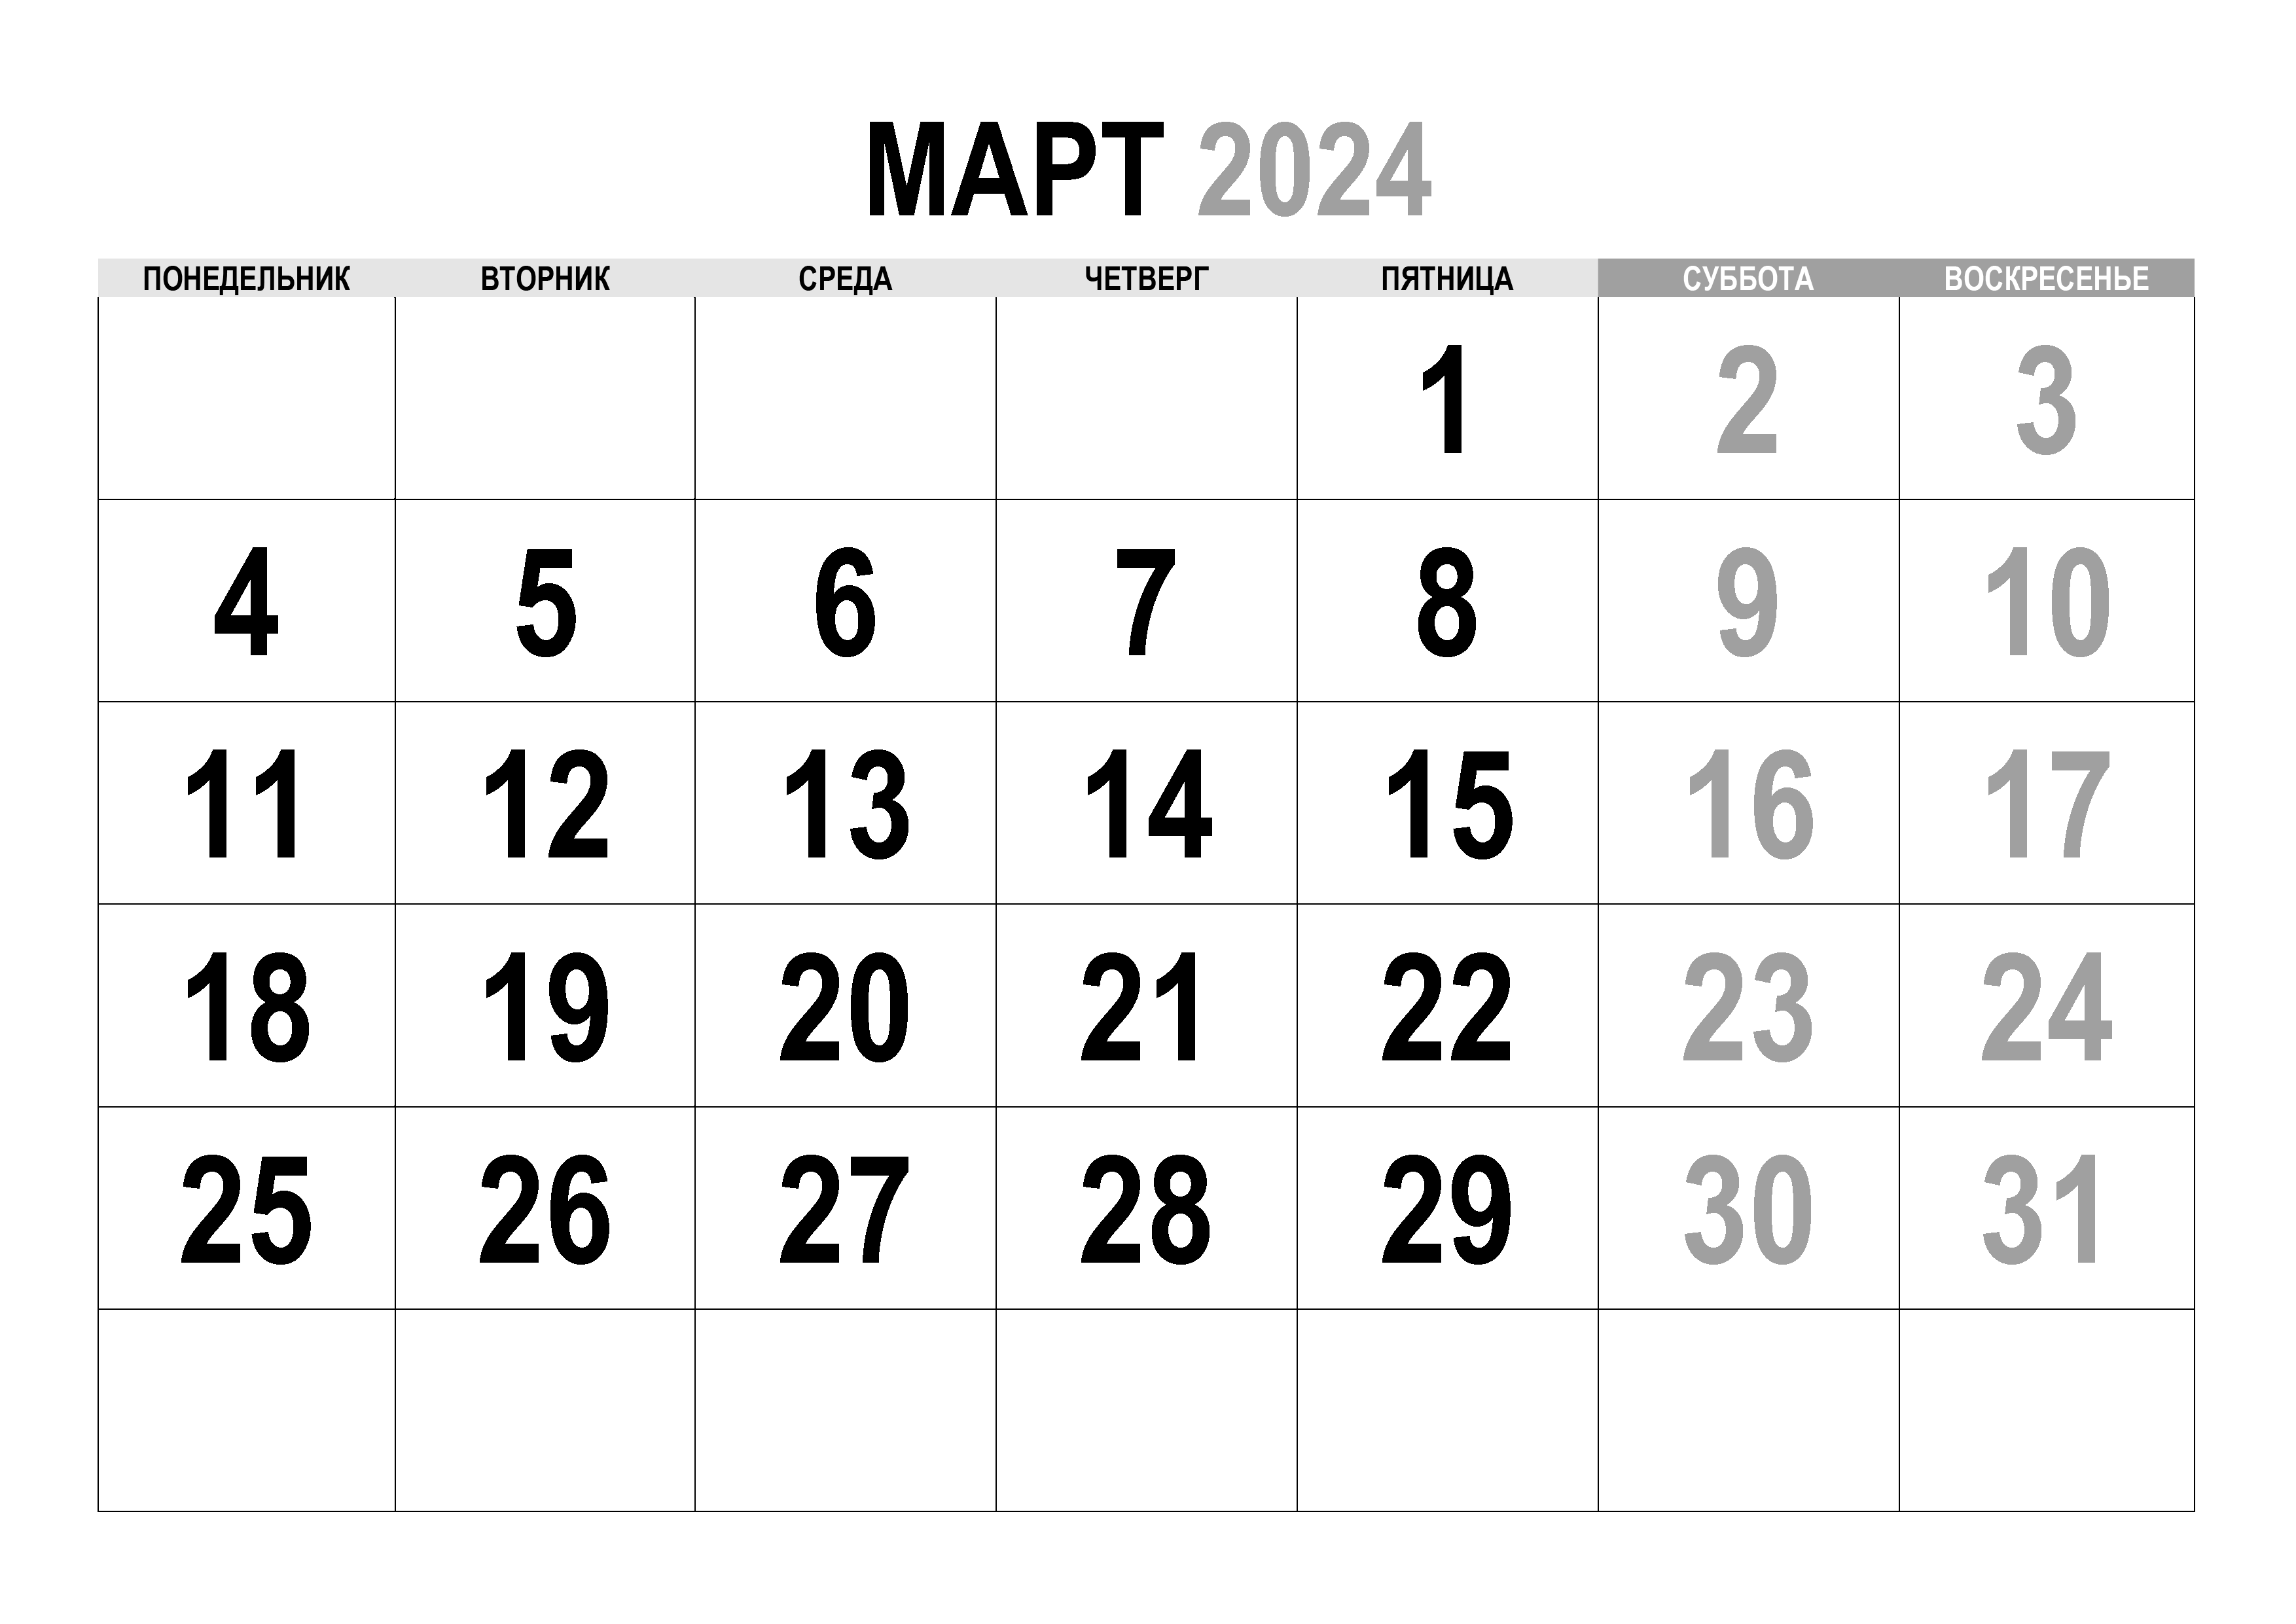

In [35]:
#посмотрим время публикации вакансиий
fig = go.Figure(data=[go.Histogram(x=data_analyst['published_at'])])
fig.update_layout(
    title="Время публикации вакансий по поиску дата аналитиков",
    title_x = 0.5,
    xaxis_title="Дата публикации",
    yaxis_title="Количество объявлений")
fig.show()


from IPython.display import Image
Image('https://3mu.ru/wp-content/uploads/2021/08/mar-2024.gif', width=400)

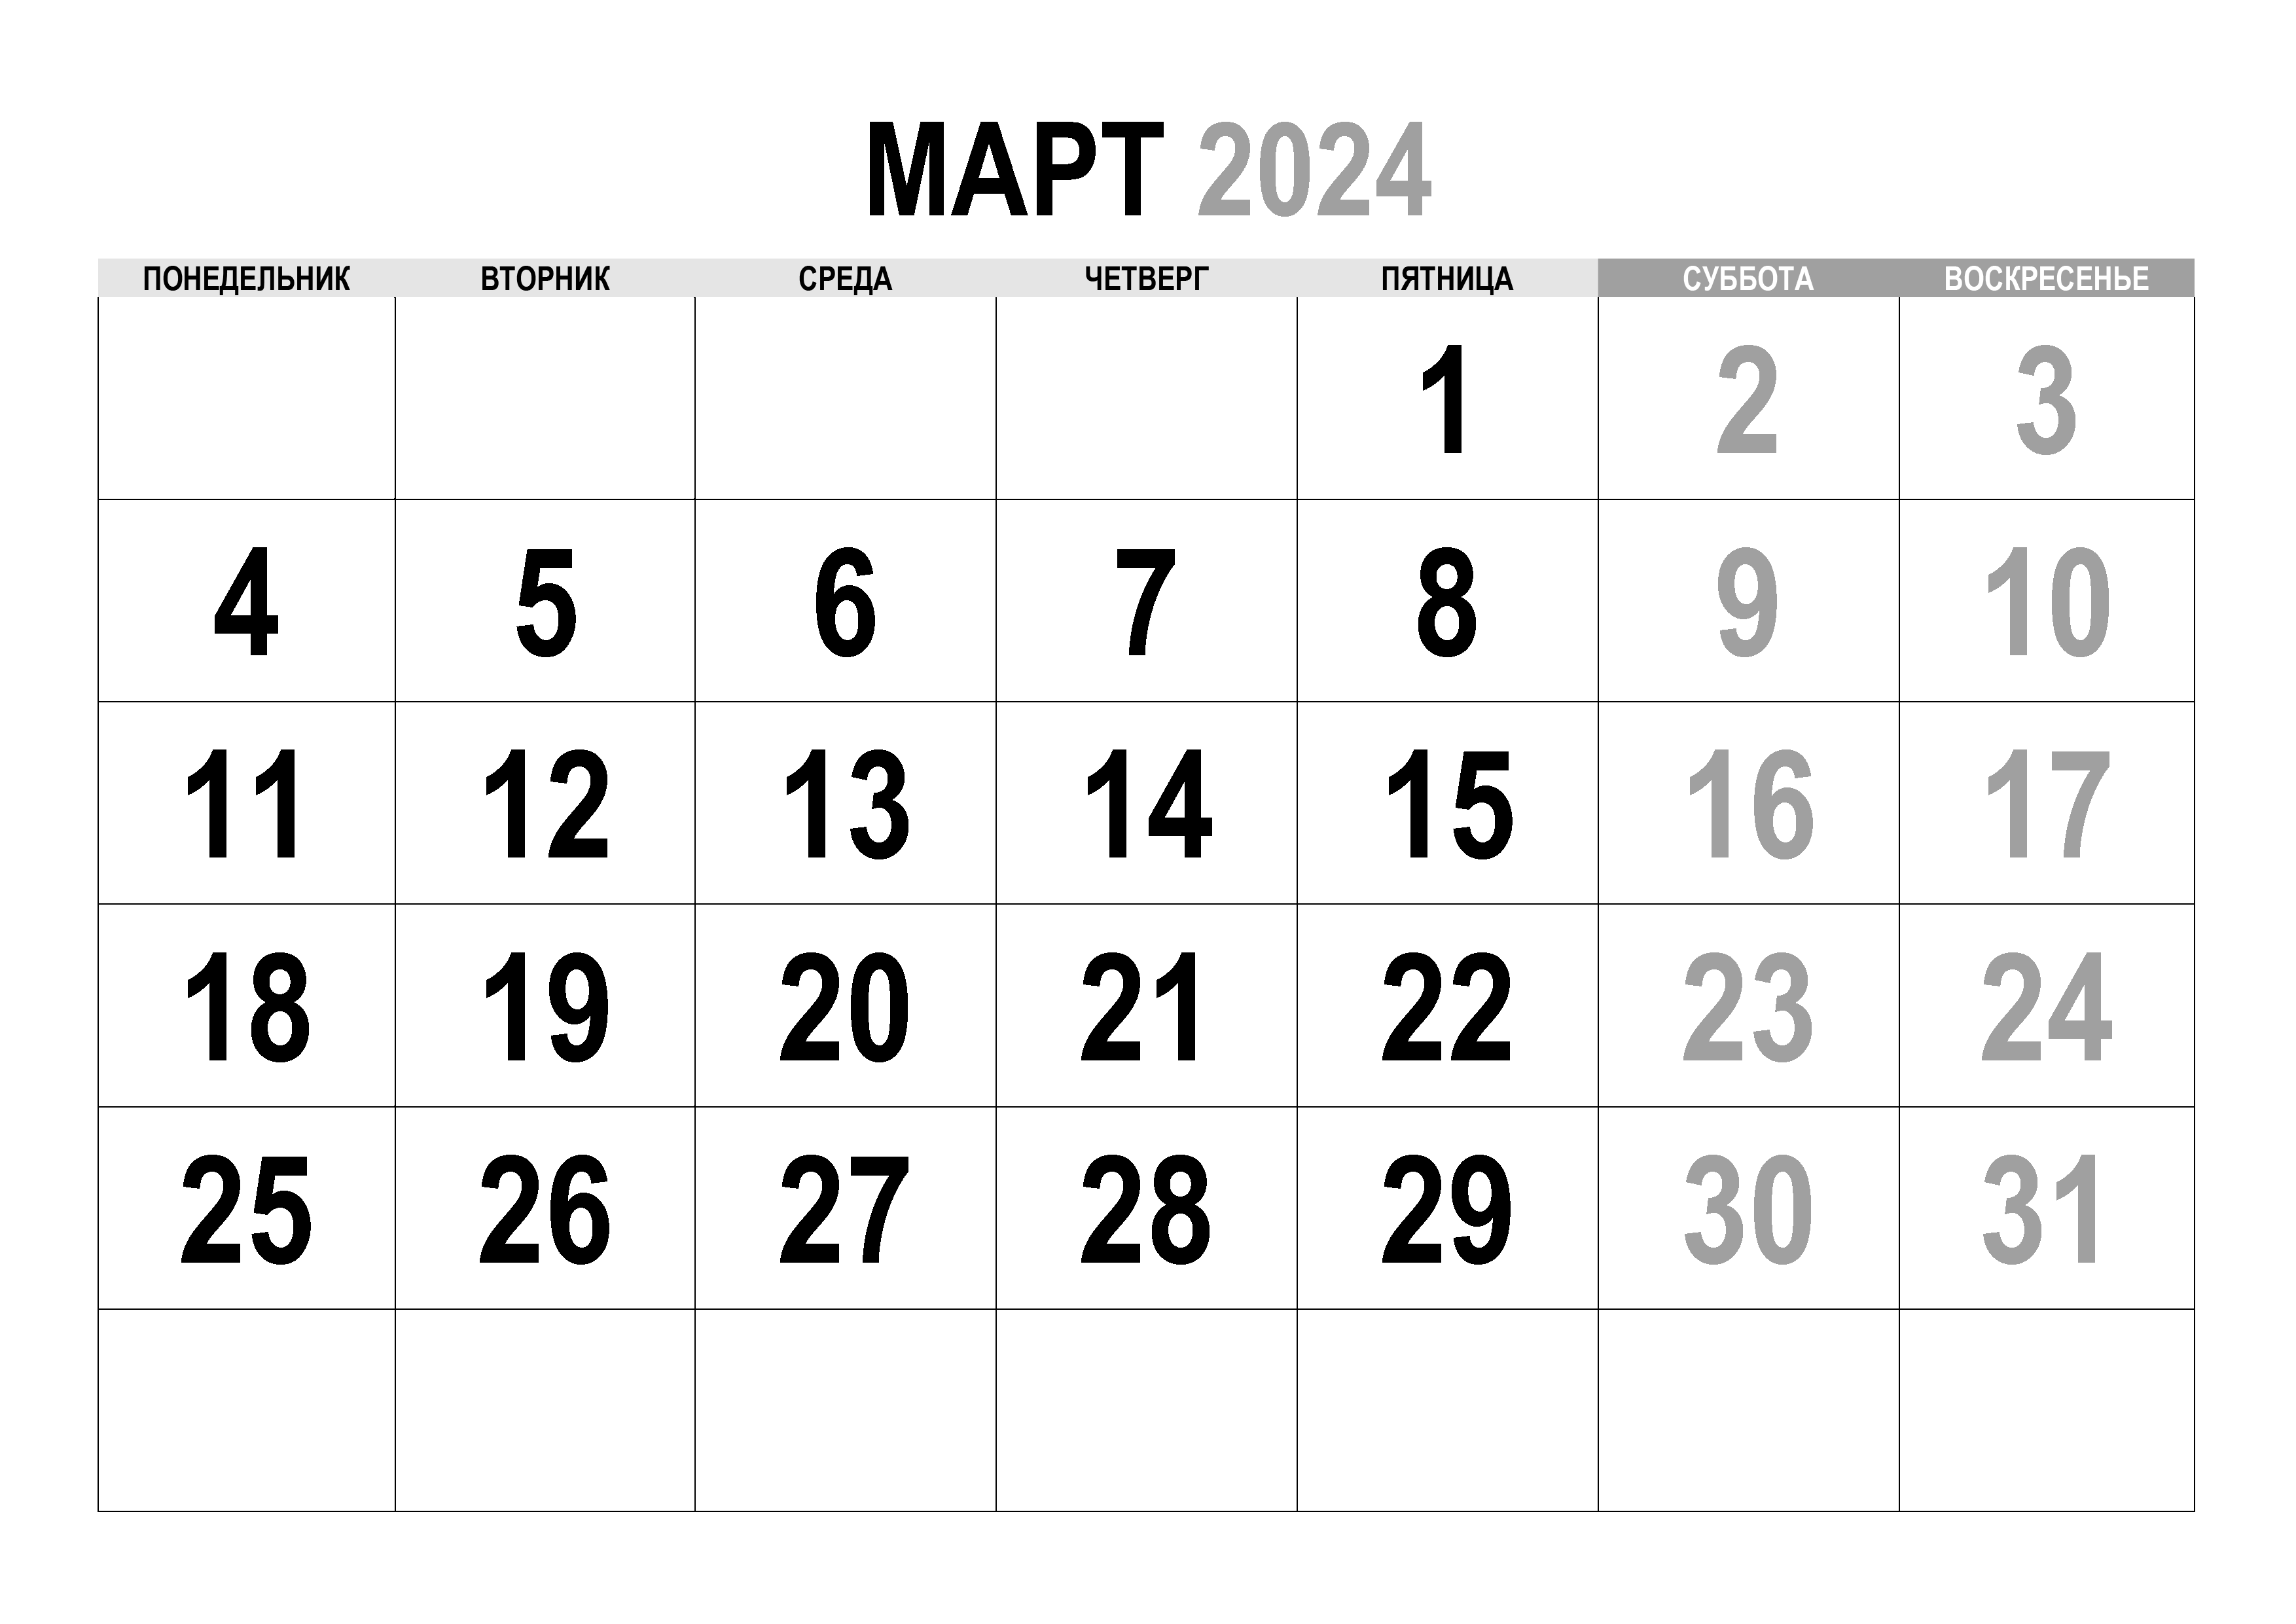

In [36]:
fig = go.Figure(data=[go.Histogram(x=bussines_analyst['published_at'])])
fig.update_layout(
    title="Время публикации вакансий по поиску бизнес аналитиков",
    title_x = 0.5,
    xaxis_title="Дата публикации",
    yaxis_title="Количество объявлений")
fig.show()
Image('https://3mu.ru/wp-content/uploads/2021/08/mar-2024.gif', width=400)

На графике видно что чаще всего вакансии выкладываюстя в понедельник и в четверг-пятницу, в выходные практически ничего не добавляется

In [37]:
#общее количество вакансий по грейдам
da_cnt_job = pd.pivot_table(data_analyst, index='experience', values='id', aggfunc='count').sort_values(by='id', ascending = False)
da_cnt_job['ratio'] = ((da_cnt_job['id'] / da_cnt_job['id'].sum()) * 100).round(1)
da_cnt_job = da_cnt_job.reset_index()
da_cnt_job.columns = ['Опыт', 'Количество', '%']
display(da_cnt_job)

name_chain = da_cnt_job.Опыт
values = da_cnt_job['Количество']
color = ['#EF553B', '#00CC96', '#636EFA', '#AB63FA']


fig = go.Figure(data=[go.Pie(labels=name_chain, values=values)])
fig.update_layout(
    title="Доля грейдов по вакансиям дата-аналитик",
    title_x = 0.5)
fig.update_traces(marker=dict(colors=color))
fig.show()

,Опыт,Количество,%
0,Junior+ (1-3 years),207,59.3
1,Middle (3-6 years),116,33.2
2,Junior (no experince),25,7.2
3,Senior (6+ years),1,0.3


In [38]:
ba_cnt_job = pd.pivot_table(bussines_analyst, index='experience', values='id', aggfunc='count').sort_values(by='id', ascending = False)
ba_cnt_job['ratio'] = ((ba_cnt_job['id'] / ba_cnt_job['id'].sum()) * 100).round(1)
ba_cnt_job = ba_cnt_job.reset_index()
ba_cnt_job.columns = ['Опыт', 'Количество', '%']
display(ba_cnt_job)

name_chain = ba_cnt_job.Опыт
values = ba_cnt_job['Количество']
color = ['#EF553B', '#00CC96', '#636EFA', '#AB63FA']

fig = go.Figure(data=[go.Pie(labels=name_chain, values=values)])
fig.update_layout(
    title="Доля грейдов по вакансиям бизнес-аналитик",
    title_x = 0.5)
fig.update_traces(marker=dict(colors=color))
fig.show()

,Опыт,Количество,%
0,Junior+ (1-3 years),485,50.2
1,Middle (3-6 years),408,42.2
2,Junior (no experince),58,6.0
3,Senior (6+ years),16,1.7


В обоих случаях больше 50% составляют вакансии по поиску Junior+ аналитиков с опытом от 1-3 лет. Более трети для Middle, менее 10% для Junior без опыта и единичные случае 0.2%-1.65% для Senior`ов.

**Шаг 3**

**Определение наиболее желаемых кандидатов на вакансии Аналитик данных**

In [39]:
#создадим функцию, чтобы можно было найти навыки для всех и каждого грейда в частности
def da_top_skill(grade):
  #создадим отдельную переменную, куда войдет столбец со всеми ключевыми навыками указанными компаниями и удалим все пустые значения
    key_da = grade['key_skills_from_key_skills_field']
    key_da = key_da.dropna()
 #переберем все элементы списков, чтобы получить один большой список, со всеми повторяющимеся навыками, которые в дальнейшем мы сможем посчитать
    skills_da = []
    for i in key_da:
        skills_da.append(i)

 #постараемся привести названия навыков к общим значениям и устраним именами написанные с ошибкой или в разных уровнях
    skill_da = ', '.join(str(x) for x in skills_da)
    skill_da = (skill_da.replace('1С: Торговля','1C')
                            .replace('A/B тесты', 'A/B тестирование')
                            .replace('Анти фрод', 'Anti-fraud')
                            .replace('ArenadataDB (GreenPlum)', 'GreenPlum')
                            .replace('Atlassian Confluence', 'Atlassian')
                            .replace('Atlassian Jira', 'Atlassian')
                            .replace('BI-отчет', 'BI')
                            .replace('bi', 'BI')
                            .replace('BI-отчетность', 'BI')
                            .replace('Business Intelligence Systems', 'BI')
                            .replace('BigData', 'Big Data')
                            .replace('BigQuery', 'Google Big Query')
                            .replace('data lens', 'Data Lens')
                            .replace('datalens', 'Data Lens')
                            .replace('Data Analyst', 'Анализ данных')
                            .replace('Data Analysis', 'Анализ данных')
                            .replace('Анализ ассортиментной линейки', 'Анализ данных')
                            .replace('Анализ рисков', 'Анализ данных')
                            .replace('Анализ бизнес показателей', 'Анализ данных')
                            .replace('Аналитик данных', 'Анализ данных')
                            .replace('Анализ рынка', 'Анализ данных')
                            .replace('Анализ финансовых показателей', 'Анализ данных')
                            .replace('Аналитика', 'Анализ данных')
                            .replace('Аналитика закупок', 'Анализ данных')
                            .replace('Аналитика продаж', 'Анализ данных')
                            .replace('Анализ данных закупок', 'Анализ данных')
                            .replace('Анализ данных продаж', 'Анализ данных')
                            .replace('Аналитические исследования', 'Анализ данных')
                            .replace('Английский — B1 — Средний', 'Английский язык')
                            .replace('ERP', 'ERP Systems')
                            .replace('hadoop', 'Hadoop')
                            .replace('hive', 'Hive')
                            .replace('Excel', 'MS Excel')
                            .replace('MS MS Excel', 'MS Excel')
                            .replace('ML', 'Machine Learning')
                            .replace('Machine learning', 'Machine Learning')
                            .replace('Машинное обучение', 'Machine Learning')
                            .replace('numpy', 'Numpy')
                            .replace('pandas', 'Pandas')
                            .replace('Postgres', 'PostgreSQL')
                            .replace('power query', 'Power Query')
                            .replace('PowerBI', 'MS Power BI')
                            .replace('MS MS Power BI', 'MS Power BI')
                            .replace('Power BI', 'MS Power BI')
                            .replace('Pytorch', 'PyTorch')
                            .replace('QlickSense', 'Qlick Sense')
                            .replace('Scipy', 'SciPy')
                            .replace('Pyspark', 'PySpark')
                            .replace('Spark', 'PySpark') # не уверен
                            .replace('Superset', 'SuperSet')
                            .replace('Superset', 'SuperSet')
                            .replace('superset', 'SuperSet')
                            .replace('tableau', 'Tableau')
                            .replace('data Scientist', 'Data Scientist')
                            .replace('Аналитические способности', 'Аналитическое мышление')
                            .replace('Аналитический склад ума', 'Аналитическое мышление')
                            .replace('База данных: Olap', 'Olap')
                            .replace('База данных: Oracle', 'Oracle')
                            .replace('Грамотная речь и письмо', 'Грамотная речь')
                            .replace('Оптимизация бизнес-процессов', 'Оптимизация бизнес процессов')
                            .replace('Системность мышления', 'Системное мышление')
                            .replace('сводные таблицы', 'Сводные таблицы')
                             )
    #разделим строку на список по запятой
    skill_da = str(skill_da).replace(', ', ',')
    skill_da = skill_da.split(',')
    #создадим датафрейм для дальнейших преобразваний
    df_skill_da = pd.DataFrame(skill_da, columns=['skill'])
    df_skill_da = df_skill_da.reset_index()
    #создадим своднуб таблицу по навыкам и посчитаем количество каждого навыка
    table_skill_da = pd.pivot_table(df_skill_da, index='skill', aggfunc='count')
    table_skill_da = table_skill_da.sort_values(by=['index'], ascending=False)
    #добавим столбец с показателем отношения навыка ко всему списку, какой процент имеет данный навые
    table_skill_da['ratio'] = ((table_skill_da['index'] / table_skill_da['index'].sum()) * 100).round(1)
    table_skill_da = table_skill_da.reset_index()
    table_skill_da.columns = ['Навык', 'Количество', '%']
    grade = table_skill_da.head(10)
    return grade


In [40]:
#выведем общий список навыков и добавим индекс, чтобы можно было обращаться к остальным столбцам
da_key_skill = da_top_skill(data_analyst)
da_key_skill

,Навык,Количество,%
0,Анализ данных,161,12.4
1,SQL,141,10.8
2,Python,111,8.5
3,Аналитическое мышление,49,3.8
4,MS Power BI,46,3.5
5,MS Excel,46,3.5
6,Работа с базами данных,36,2.8
7,Работа с большим объемом информации,36,2.8
8,MS SQL,31,2.4
9,Tableau,21,1.6


In [41]:
#покажем на графике топ 10 навыков
labels = da_key_skill['Навык'].head(10)
values = da_key_skill['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Ключевые навыки для дата аналитика",
    title_x = 0.5,
    xaxis_title="Навыки",
    yaxis_title="Количество объявлений")
fig.show()

Проанализировав все указанные скиллы работадателями по вакансиям дата аналитик, можно заметить, что основная масса это хард скиллы, софт скиллы встречаются дважды в топ-30, это Аналитическое мышление (топ-4) и Работа в команде (топ-28).
Основные хард скиллы это анализ данных, SQL, Python, Power BI, Excel.

In [42]:
#использую функцию найдем навыки для Senior`a, предварительно сделав срез по опыту
da_sen_skill = da_top_skill(data_analyst.query('experience == "Senior (6+ years)"'))
da_sen_skill['Опыт'] = "Senior (6+ years)"
da_sen_skill

,Навык,Количество,%,Опыт
0,Big Data,1,20.0,Senior (6+ years)
1,MS Excel,1,20.0,Senior (6+ years)
2,data lake,1,20.0,Senior (6+ years)
3,data science,1,20.0,Senior (6+ years)
4,Бизнес-анализ,1,20.0,Senior (6+ years)


In [43]:
#выведем визуально список навыков
labels = da_sen_skill['Навык'].head(10)
values = da_sen_skill['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ навыков для Senior дата аналитика",
    title_x = 0.5,
    xaxis_title="Навыки",
    yaxis_title="Количество объявлений")
fig.show()

К сожалению в представленном дата сете представлена лишь одна вакансия для Senior по дата аналитике, из данной вакансии видно, что требуются только хард скиллы, которые почти не встречаются у других грейдов: BigData, data lake, data science и так же Excel и бизнес-анализ

In [44]:
#повторим срез для Middle и всех Junior позже
da_mid_skill = da_top_skill(data_analyst.query('experience == "Middle (3-6 years)"'))
da_mid_skill['Опыт'] = "Middle (3-6 years)"
da_mid_skill

,Навык,Количество,%,Опыт
0,SQL,55,11.7,Middle (3-6 years)
1,Анализ данных,52,11.1,Middle (3-6 years)
2,Python,48,10.2,Middle (3-6 years)
3,MS Power BI,18,3.8,Middle (3-6 years)
4,Аналитическое мышление,17,3.6,Middle (3-6 years)
5,Базы данных,9,1.9,Middle (3-6 years)
6,PostgreSQL,8,1.7,Middle (3-6 years)
7,Математическая статистика,8,1.7,Middle (3-6 years)
8,Статистический анализ,8,1.7,Middle (3-6 years)
9,MS SQL,8,1.7,Middle (3-6 years)


In [45]:
labels = da_mid_skill['Навык'].head(10)
values = da_mid_skill['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ навыков для Middle дата аналитика",
    title_x = 0.5,
    xaxis_title="Навыки",
    yaxis_title="Количество объявлений")
fig.show()

Для Middle на первых местах хард скиллы: SQL, Анализ данных и  Python, данные три позиции имеют примерно равное значение, на четвертом месте Power BI и только после это идет софт скилл - Аналитическое мышление, которые встречается в вакансиях в 3 раза меньше, чем лидеры списка

In [46]:
da_jun_p_skill = da_top_skill(data_analyst.query('experience == "Junior+ (1-3 years)"'))
da_jun_p_skill['Опыт'] = "Junior+ (1-3 years)"
da_jun_p_skill

,Навык,Количество,%,Опыт
0,Анализ данных,101,13.4,Junior+ (1-3 years)
1,SQL,77,10.3,Junior+ (1-3 years)
2,Python,57,7.6,Junior+ (1-3 years)
3,MS Excel,32,4.3,Junior+ (1-3 years)
4,Аналитическое мышление,29,3.9,Junior+ (1-3 years)
5,MS Power BI,26,3.5,Junior+ (1-3 years)
6,Работа с базами данных,26,3.5,Junior+ (1-3 years)
7,Работа с большим объемом информации,25,3.3,Junior+ (1-3 years)
8,MS SQL,20,2.7,Junior+ (1-3 years)
9,Tableau,13,1.7,Junior+ (1-3 years)


In [47]:
labels = da_jun_p_skill['Навык'].head(10)
values = da_jun_p_skill['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ навыков для Junior+ дата аналитика",
    title_x = 0.5,
    xaxis_title="Навыки",
    yaxis_title="Количество объявлений")
fig.show()

Для Junior+ основным скиллом является Анализ данных, SQL, Python. Затем идет группа скиллов, котрые указывают примерно в 2-3 раза реже лидеров - Excel, Аналитическое мышление, Power BI, работа с базами данных

In [48]:
da_jun_skill = da_top_skill(data_analyst.query('experience == "Junior (no experince)"'))
da_jun_skill['Опыт'] = "Junior (no experince)"
da_jun_skill

,Навык,Количество,%,Опыт
0,SQL,9,11.7,Junior (no experince)
1,Анализ данных,8,10.4,Junior (no experince)
2,MS Excel,7,9.1,Junior (no experince)
3,Python,6,7.8,Junior (no experince)
4,MS PowerPoint,4,5.2,Junior (no experince)
5,Работа с большим объемом информации,4,5.2,Junior (no experince)
6,Аналитическое мышление,3,3.9,Junior (no experince)
7,MS SQL,3,3.9,Junior (no experince)
8,Английский язык,2,2.6,Junior (no experince)
9,Базы данных,2,2.6,Junior (no experince)


In [49]:
labels = da_jun_skill['Навык'].head(10)
values = da_jun_skill['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ навыков для Junior дата аналитика",
    title_x = 0.5,
    xaxis_title="Навыки",
    yaxis_title="Количество объявлений")
fig.show()

Для Джунов топ-5 скиллов только хард скиллы - SQL, Анализ данных, Excel, Python, PowerPoint.

In [50]:
#объединим получившиеся таблицы по срезам, чтобы можно было на графике показать топ навыков и каких категорий больше в них
key_skill_exp = pd.concat([da_sen_skill.head(10), da_mid_skill.head(10), da_jun_p_skill.head(10), da_jun_skill.head(10)])
#удалим столбец ration, здесь он нам не нужен
key_skill_exp = key_skill_exp.drop(['%'], axis=1)
key_skill_exp_pt =  pd.pivot_table(key_skill_exp, index='Навык', columns=['Опыт'], aggfunc='sum')
#добавим столбец total, чтобы провести сортировку по нему
key_skill_exp_pt['Total'] = key_skill_exp_pt.sum(axis=1)
key_skill_exp_pt = key_skill_exp_pt.reset_index()
key_skill_exp_pt.columns = ['Навык', 'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'total']
key_skill_exp_pt = (key_skill_exp_pt.sort_values(by=['total'], ascending=False))
#display(key_skill_exp_pt)

#выведем на экран график по навыкам и опыту, без учета столбца total
fig = px.bar(key_skill_exp_pt.loc[:, key_skill_exp_pt.columns != 'total'].head(10),
             x="Навык",
             y=['Junior (no experince)',
                'Junior+ (1-3 years)',
                'Middle (3-6 years)',
                'Senior (6+ years)'],
             title="Топ скиллов по грейдам")
fig.update_layout(
    title="Топ навыков для дата аналитика по всем грейдам",
    title_x = 0.5,
    xaxis_title="Навыки",
    yaxis_title="Количество объявлений")
fig.show()

На графике видны основные запросы для позиций Junior+. В первую очередь работодатели ищут сотрудников со знанием и опытом работы в анализе данных, SQL, Python, Power BI, Excel, Tableau, также от кандидатов ждут аналитическое мышление, умение работать с базами данных и с больших объемом информации.

Для сотрудников без опыта работы ключевыми навыками являются анализ данных, SQL, Python, Excel, Power Point, также аналитическое мышление, работа с большим объемом информации, знание английского языка

**Определение наиболее желаемых кандидатов на вакансии Бизнес-аналитик**

In [109]:
#повторим предедущий шаг с дата аналитики
def ba_top_skill(grade):
    ba_key = grade['key_skills_from_key_skills_field']
    ba_key = ba_key.dropna()

    ba_skills = []
    for i in ba_key:
        ba_skills.append(i)


    ba_skills = ', '.join(str(x) for x in ba_skills)
    ba_skills = (ba_skills.replace('1 C ERP 2.5.7.','1С: ERP')
                      .replace('1 с предприятие', '1С: Предприятие')
                      .replace('1C', '1С')
                      .replace('1С Предприятие 8', '1С: Предприятие')
                      .replace('1С: Предприятие 8', '1С: Предприятие')
                      .replace('1 C ERP', '1С: ERP')
                      .replace('1С:ERP', '1С: ERP')
                      .replace('1С: Зарплата и кадры', '1С: Зарплата и управление персоналом')
                      .replace('1С: Управление персоналом', '1С: Зарплата и управление персоналом')
                      .replace('1С:Комплексная автоматизация', '1С: Комплексная автоматизация')
                      .replace('1С:Предприятие 8.3', '1С: Предприятие')
                      .replace('223 -ФЗ', '223-ФЗ')
                      .replace('Analysis', 'Анализ данных')
                      .replace('as is и to be', 'AS IS/TO BE mapping')
                      .replace('Atlassian Confluence', 'Jira')
                      .replace('Atlassian Jira', 'Jira')
                      .replace('BPMN2.0', 'BPMN 2.0')
                      .replace('Buisiness Studio', 'Business Studio')
                      .replace('CRM Bitrix24', 'Bitrix24')
                      .replace('Confluence.', 'Confluence')
                      .replace('ERP Systems', 'ERP')
                      .replace('ERP-системы', 'ERP')
                      .replace('ERP-системы на базе 1С', '1С: ERP')
                      .replace('Elma', 'ELMA')
                      .replace('Excel', 'MS Excel')
                      .replace('Git/Gitlab', 'Git')
                      #.replace('Jira', 'Atlassian')
                      .replace('Jira/Confluence', 'Jira')
                      .replace('KANBAN', 'Kanban')
                      .replace('Access', 'MS Access')
                      .replace('MS PowerPoin', 'MS PowerPoint')
                      .replace('MS Visia', 'MS Visio')
                      .replace('Microsoft SQL', 'MS SQL')
                      .replace('Office', 'MS Office')
                      .replace('PL/SQL', 'Oracle Pl/SQL')
                      .replace('PowerBI', 'Power BI')
                      .replace('REST API', 'RestAPI')
                      .replace('SWOT анализ', 'SWOT')
                      .replace('UML)', 'UML')
                      .replace('UI/UX', 'UX/UI')
                      .replace('Use Cases', 'Use Case')
                      .replace('User story', 'User Story')
                      .replace('Visio', 'MS Visio')
                      .replace('business studio', 'Business Studio')
                      .replace('clickhouse', 'ClickHouse')
                      .replace('dfd', 'DFD')
                      .replace('excel', 'MS Excel')
                      .replace('figma', 'Figma')
                      .replace('kanban', 'Kanban')
                      .replace('power pivot', 'Power Pivot')
                      .replace('power query', 'Power Query')
                      .replace('powerBI', 'Power BI')
                      .replace('tableau', 'Tableau')
                      .replace('use cases', 'Use Case')
                      .replace('user story', 'User Story')
                      .replace('vad', 'VAD')
                      .replace('Анализа', 'Анализ данных')
                      .replace('Анализ', 'Анализ данных')
                      .replace('Анализ данных рынка', 'Анализ данных')
                      .replace('Анализ данных ассортиментной линейки', 'Анализ данных')
                      .replace('Анализ данных бизнес показателей', 'Анализ данных')
                      .replace('Анализ данных бизнес процессов', 'Анализ данных')
                      .replace('Анализ данных бизнес-процессов', 'Анализ данных')
                      .replace('Анализ данных данных', 'Анализ данных')
                      .replace('Анализ данных инвестиционных проектов', 'Анализ данных')
                      .replace('Анализ данных поведения пользователей', 'Анализ данных')
                      .replace('Анализ данных предметной области', 'Анализ данных')
                      .replace('Анализ данных рисков', 'Анализ данных')
                      .replace('Анализ данных рынка', 'Анализ данных')
                      .replace('Анализ данных текущей ситуации', 'Анализ данных')
                      .replace('Анализ данных текущих финансовых показателей', 'Анализ данных')
                      .replace('Анализ данных требований', 'Анализ данных')
                      .replace('Анализ данных финансовых показателей', 'Анализ данных')
                      #.replace('Аналитик', 'Анализ данных')
                      .replace('Аналитика продаж', 'Анализ данных')
                      .replace('Аналитика', 'Анализ данных')
                      .replace('Аналитическая работа', 'Анализ данных')
                      .replace('Аналитические исследования', 'Анализ данных')
                      .replace('Аналитические способности', 'Аналитическое мышление')
                      .replace('Аналитический склад ума', 'Аналитическое мышление')
                      .replace('Английский — B2 — Средне-продвинутый', 'Английский язык')
                      .replace('Базовые знания SQL', 'SQL')
                      .replace('Банковские гарантии', 'Банкинг')
                      .replace('Банкоматные протоколы', 'Банкинг')
                      .replace('Бизнес-аналитика', 'Бизнес анализ')
                      .replace('Бизнес-анализ', 'Бизнес анализ')
                      .replace('Битрикс24', 'Битрикс 24')
                      .replace('Бухгалтерия', 'Бухгалтерский учет')
                      .replace('ГОСТ34', 'ГОСТ 34')
                      .replace('Грамотная устная и письменная речь', 'Грамотность')
                      .replace('Грамотная речь', 'Грамотность')
                      .replace('Деловое общение', 'Деловая коммуникация')
                      .replace('Деловая переписка', 'Деловая коммуникация')
                      .replace('Знание основ SQL', 'SQL')
                      .replace('Знание принципов работы банкоматного ПО', 'Банкинг')
                      .replace('Знание принципов работы платежных систем', 'Банкинг')
                      .replace('Знание требований информационной безопасности', 'Информационная безопасность')
                      .replace('Внедрение систем информационной безопасности', 'Информационная безопасность')
                      .replace('Коммуникативные навыки', 'Коммуникабельность')
                      .replace('Моделирование бизнес-процессов предприятия', 'Моделирование бизнес процессов')
                      .replace('Навыки делового общения', 'Деловая коммуникация')
                      .replace('Написание ТЗ', 'Написание технических заданий')
                      .replace('Оптимизация бизнес процессов', 'Оптимизация бизнес-процессов')
                      .replace('Организация семинаров', 'Организация обучения для специалистов')
                      .replace('Организация учебного процесса', 'Организация обучения для специалистов')
                      .replace('Организаторские навыки', 'Организационные навыки')
                      .replace('Планирование карьеры', 'Планирование')
                      .replace('Планирование проекта', 'Планирование')
                      .replace('Планирование рабочего дня руководителя', 'Планирование')
                      .replace('Пользователь MS Excel', 'MS Excel')
                      .replace('Разработка инструкций', 'Разработка документации')
                      .replace('Разработка концепции', 'Разработка документации')
                      .replace('Разработка продуктовой концепции', 'Разработка документации')
                      .replace('Разработка проектной документации', 'Разработка документации')
                      .replace('Разработка регламентов', 'Разработка документации')
                      .replace('Разработка технических заданий', 'Разработка документации')
                      .replace('Разработка и внедрение системы KPI', 'Разработка документации')
                      .replace('СRМ', 'CRM')
                      .replace('Сamunda', 'Camunda')
                      .replace('Сбор и анализ информации', 'Сбор')
                      .replace('Сбор и анализ требований', 'Сбор')
                      .replace('Сбор требований', 'Сбор')
                      .replace('Составление ТЗ', 'Написание технических заданий')
                      .replace('Уверенный пользователь MS MS Office', 'MS Office')
                      .replace('Умение анализировать', 'Анализ данных')
                      .replace('анализ и систематизация информации', 'Анализ данных')
                      .replace('антифрод', 'AntiFraud')
                      .replace('бизнес аналитик', 'Бизнес-анализ')
                      .replace('бизнес-аналитик', 'Бизнес-анализ')
                      .replace('качество данных', 'Data Quality')
                      .replace('составление технических заданий', 'Написание технических заданий')
                      .replace('уверенный пользователь MS MS Excel', 'MS Excel')
                      )


    ba_skills = str(ba_skills).replace(', ', ',')
    ba_skills = ba_skills.split(',')

    df_skill_ba = pd.DataFrame(ba_skills, columns=['skill'])
    df_skill_ba = df_skill_ba.reset_index()

    table_skill_ba = pd.pivot_table(df_skill_ba, index='skill', aggfunc='count')
    table_skill_ba = table_skill_ba.sort_values(by=['index'], ascending=False)
    table_skill_ba['ratio'] = ((table_skill_ba['index'] / table_skill_ba['index'].sum()) * 100).round(1)
    table_skill_ba = table_skill_ba.reset_index()
    table_skill_ba.columns = ['Навык', 'Количество', '%']
    grade = table_skill_ba.head(10)
    return grade



In [110]:
ba_key_skill = ba_top_skill(bussines_analyst)
ba_key_skill

,Навык,Количество,%
0,Бизнес анализ,301,8.0
1,Анализ данных,232,6.2
2,BPMN,189,5.0
3,Аналитическое мышление,136,3.6
4,Разработка документации,121,3.2
5,Моделирование бизнес процессов,117,3.1
6,SQL,117,3.1
7,Оптимизация бизнес-процессов,115,3.1
8,Jira,113,3.0
9,UML,98,2.6


In [111]:
labels = ba_key_skill['Навык'].head(10)
values = ba_key_skill['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ навыков для бизнес аналитика",
    title_x = 0.5,
    xaxis_title="Навыки",
    yaxis_title="Количество объявлений")
fig.show()

Для бизнес аналитиков основными скиллами являются хард-скиллы, но здесь представленно больше сотф-скиллов, по сравнению с дата аналитиками.
Хард скиллы которые чаще всего требуются - Бизнес анализ(Топ-1), Анализ данных(2), BPMN(3), Разработка документации (5).
Софт скиллы - Аналитическое мышление (Топ-4), Постановка задач разработчикам(13), Деловая коммуникация(15), Подготовка презентаций(19)


In [112]:
ba_sen_skill = ba_top_skill(bussines_analyst.query('experience == "Senior (6+ years)"'))
ba_sen_skill['Опыт'] = "Senior (6+ years)"
ba_sen_skill

,Навык,Количество,%,Опыт
0,Анализ данных,6,10.5,Senior (6+ years)
1,BPMN,5,8.8,Senior (6+ years)
2,Бизнес анализ,4,7.0,Senior (6+ years)
3,REST,3,5.3,Senior (6+ years)
4,JSON,3,5.3,Senior (6+ years)
5,XML,3,5.3,Senior (6+ years)
6,SQL,3,5.3,Senior (6+ years)
7,Аналитическое мышление,2,3.5,Senior (6+ years)
8,UML,2,3.5,Senior (6+ years)
9,SOAP,2,3.5,Senior (6+ years)


In [113]:
labels = ba_sen_skill['Навык']
values = ba_sen_skill['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ навыков для Senior бизнес аналитика",
    title_x = 0.5,
    xaxis_title="Навыки",
    yaxis_title="Количество объявлений")
fig.show()

Основные требования к Senior`ам знание BPMN, бизнес анализа, анализа данных, JSON, XML. Так же достаточное количество софт скиллов, таких как постановка задач разработчикам, аналитическое мышление, деловая коммуникация, организационные навыки и подготовка презентаций.

In [114]:
ba_mid_skill = ba_top_skill(bussines_analyst.query('experience == "Middle (3-6 years)"'))
ba_mid_skill['Опыт'] = "Middle (3-6 years)"
ba_mid_skill

,Навык,Количество,%,Опыт
0,Бизнес анализ,131,9.0,Middle (3-6 years)
1,BPMN,81,5.6,Middle (3-6 years)
2,Анализ данных,71,4.9,Middle (3-6 years)
3,Моделирование бизнес процессов,52,3.6,Middle (3-6 years)
4,Разработка документации,49,3.4,Middle (3-6 years)
5,SQL,46,3.2,Middle (3-6 years)
6,UML,44,3.0,Middle (3-6 years)
7,Оптимизация бизнес-процессов,42,2.9,Middle (3-6 years)
8,Jira,42,2.9,Middle (3-6 years)
9,Аналитическое мышление,34,2.3,Middle (3-6 years)


In [115]:
labels = ba_mid_skill['Навык']
values = ba_mid_skill['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ навыков для Middle бизнес аналитика",
    title_x = 0.5,
    xaxis_title="Навыки",
    yaxis_title="Количество объявлений")
fig.show()

Для Middle бизнес аналитиков в топе исключительно хард скиллы - Бизнес анализ, BPMN, Анализ данных, Моделирование бизнес процессов, разработка документации, SQL

In [116]:
ba_jun_p_skill = ba_top_skill(bussines_analyst.query('experience == "Junior+ (1-3 years)"'))
ba_jun_p_skill['Опыт'] = "Junior+ (1-3 years)"
ba_jun_p_skill

,Навык,Количество,%,Опыт
0,Бизнес анализ,147,7.5,Junior+ (1-3 years)
1,Анализ данных,144,7.3,Junior+ (1-3 years)
2,BPMN,93,4.7,Junior+ (1-3 years)
3,Аналитическое мышление,84,4.3,Junior+ (1-3 years)
4,Оптимизация бизнес-процессов,70,3.6,Junior+ (1-3 years)
5,Jira,65,3.3,Junior+ (1-3 years)
6,Разработка документации,63,3.2,Junior+ (1-3 years)
7,SQL,58,3.0,Junior+ (1-3 years)
8,Моделирование бизнес процессов,51,2.6,Junior+ (1-3 years)
9,UML,45,2.3,Junior+ (1-3 years)


In [117]:
labels = ba_jun_p_skill['Навык'].head(10)
values = ba_jun_p_skill['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ навыков для Junior+ бизнес аналитика",
    title_x = 0.5,
    xaxis_title="Навыки",
    yaxis_title="Количество объявлений")
fig.show()

От Junior+ ожидают знание бизнес анализа и анализа данных, BPMN, Аналитического мышления, оптимизация бизнес процессов

In [118]:
ba_jun_skill = ba_top_skill(bussines_analyst.query('experience == "Junior (no experince)"'))
ba_jun_skill['Опыт'] = "Junior (no experince)"
ba_jun_skill.head(10)

,Навык,Количество,%,Опыт
0,Бизнес анализ,19,6.5,Junior (no experince)
1,Аналитическое мышление,16,5.5,Junior (no experince)
2,Моделирование бизнес процессов,13,4.5,Junior (no experince)
3,1С: Зарплата и управление персоналом,12,4.1,Junior (no experince)
4,Анализ данных,11,3.8,Junior (no experince)
5,SQL,10,3.4,Junior (no experince)
6,BPMN,10,3.4,Junior (no experince)
7,Разработка документации,9,3.1,Junior (no experince)
8,ERP на базе 1С,7,2.4,Junior (no experince)
9,UML,7,2.4,Junior (no experince)


In [119]:
labels = ba_jun_skill['Навык']
values = ba_jun_skill['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ навыков для Junior бизнес аналитика",
    title_x = 0.5,
    xaxis_title="Навыки",
    yaxis_title="Количество объявлений")
fig.show()

К джунам предъявляют требования - знание бизнес анализа, аналитическое мышление, моделирование безнес процессов, анализ данных, SQL. Среди требований виден большой запрос на знание продуктов 1С (Зарплата и управлениче персоналом, Бухгалтерский учет, Предприятие)

In [120]:
key_skill_exp = pd.concat([ba_sen_skill.head(10), ba_mid_skill.head(10), ba_jun_p_skill.head(10), ba_jun_skill.head(10)])
key_skill_exp = key_skill_exp.drop(['%'], axis=1)
key_skill_exp_pt =  pd.pivot_table(key_skill_exp, index='Навык', columns=['Опыт'], aggfunc='sum')
key_skill_exp_pt['Total'] = key_skill_exp_pt.sum(axis=1)
key_skill_exp_pt = key_skill_exp_pt.reset_index()
key_skill_exp_pt.columns = ['Навык', 'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'total']
key_skill_exp_pt = (key_skill_exp_pt.sort_values(by=['total'], ascending=False))
#display(key_skill_exp_pt)


fig = px.bar(key_skill_exp_pt.loc[:, key_skill_exp_pt.columns != 'total'].head(10),
             x="Навык",
             y=['Junior (no experince)',
                'Junior+ (1-3 years)',
                'Middle (3-6 years)',
                'Senior (6+ years)'],
             title="Топ скиллов по грейдам")
fig.update_layout(
    title="Топ навыков для бизнес аналитика по всем грейдам",
    title_x = 0.5,
    xaxis_title="Навыки",
    yaxis_title="Количество объявлений")
fig.show()

Здесь также основной запрос нацелен на Junior+, ключевыми требованиями являются знание бизнес анализа, анализа данных, BPMN, SQL, Jira, UML, также моделирование и оптимизация бизнес процессов, аналитическое мышление, разработка документации.

Для Junior кандидатов остаются запросы на бизнес анализ и анализ данных, BPMN и моделирование бизнес процессов, знание SQL, аналитическое мышление и разработка документации, встречаются запросы на знание 1С и ее видов.

**Шаг 4. Определение типичного места работы**

**для Аналитика данных**

In [121]:
def job_place(place):
    #создадим свобдную таблицу,чтобы посмотреть топ по определенным значениям по количеству вакансий

    place['ratio'] = ((place['count'] / place['count'].sum()) * 100).round(1)
    place.columns = ['Count', 'ratio']
    #добавим индекс, чтобы мы могли использовать столбец с именем в дальнейшем
    place = (place.sort_values(by=['Count'], ascending=False)).reset_index()
    return place



In [122]:
#добавим данный код, чтобы не выводилось сообщение об ошибке
pd.options.mode.chained_assignment = None #default='warn'
#повторим таблицу, но теперь добавим столбец с опытом
def job_place_experience(place):
    place.columns = ['Count']
#добавим индекс, чтобы мы могли использовать столбец с именем
    place = (place.sort_values(by=['experience', 'Count'], ascending=False)).reset_index()
    #посчитаем отношение внутри каждого грейда
    sen_area = place[place['experience'] == 'Senior (6+ years)']
    sen_area['ratio'] = (sen_area['Count'] / sen_area['Count'].sum()) * 100
    mid_area = place[place['experience'] == 'Middle (3-6 years)']
    mid_area['ratio'] = (mid_area['Count'] / mid_area['Count'].sum()) * 100
    jun_p_area = place[place['experience'] == 'Junior+ (1-3 years)']
    jun_p_area['ratio'] = (jun_p_area['Count'] / jun_p_area['Count'].sum()) * 100
    jun_area = place[place['experience'] == 'Junior (no experince)']
    jun_area['ratio'] = (jun_area['Count'] / jun_area['Count'].sum()) * 100
    #соберем все таблицу в одну единую
    top_cnt_emp_by_exp_top =  pd.concat([sen_area.head(5), mid_area.head(5),  jun_p_area.head(5), jun_area.head(5)])
    return top_cnt_emp_by_exp_top

По городам

In [123]:
#используем наши функции для определения топа по необходимым столбцам
da_cnt_area = data_analyst.pivot_table(index=['area'], values='id', aggfunc=['count'])
da_top_area = job_place(da_cnt_area)
da_top_area.columns = ['Город', 'Количество', '%']
display(da_top_area.head(10))

da_top_4_area = da_top_area.head(3)
da_rest_area = da_top_area.drop(index=[0, 1, 2])
da_rest_area.loc['Остальные города'] = da_rest_area.sum()
da_rest_area = da_rest_area.tail(1).drop('Город', axis=1).reset_index()
da_rest_area.columns=['Город', 'Количество', '%']
da_top_area_pie = pd.concat([da_top_4_area, da_rest_area])
#display(da_top_area_pie)

,Город,Количество,%
0,Москва,246,70.5
1,Санкт-Петербург,24,6.9
2,Екатеринбург,8,2.3
3,Казань,7,2.0
4,Нижний Новгород,6,1.7
5,Новосибирск,6,1.7
6,Краснодар,6,1.7
7,Владивосток,6,1.7
8,Иваново (Ивановская область),3,0.9
9,Тюмень,3,0.9


In [124]:
top_area = da_top_area_pie.Город
values_top_area = da_top_area_pie['Количество']
#color = ['#EF553B', '#00CC96', '#636EFA', '#AB63FA']

fig = go.Figure(data=[go.Pie(labels=top_area, values=values_top_area)])
fig.update_layout(
    title="Доля вакансий по городам",
    title_x = 0.5)
#fig.update_traces(marker=dict(colors=color))
fig.show()

Наибольшое число вакансий представленны в Мосвке 70%, что не удивительно, так как в Мосвке находится больше всего компаний, на втором месте Санкт-Петербург 7%, на третьем Екатеринбург 2.2%

In [125]:
#используем вторую функцию для определения лидеров в каждом грейде
da_area_exp = data_analyst.pivot_table(index=['area', 'experience'], values='id', aggfunc=['count'])
da_top_area_exp = job_place_experience(da_area_exp)
da_top_area_exp.columns = ['Город', 'Опыт', 'Количество', '%']
da_top_area_exp

,Город,Опыт,Количество,%
0,Москва,Senior (6+ years),1,100.000000
1,Москва,Middle (3-6 years),86,74.137931
2,Санкт-Петербург,Middle (3-6 years),8,6.896552
3,Екатеринбург,Middle (3-6 years),4,3.448276
4,Казань,Middle (3-6 years),4,3.448276
5,Тюмень,Middle (3-6 years),3,2.586207
15,Москва,Junior+ (1-3 years),143,69.082126
16,Санкт-Петербург,Junior+ (1-3 years),13,6.280193
17,Владивосток,Junior+ (1-3 years),5,2.415459
18,Екатеринбург,Junior+ (1-3 years),4,1.932367


In [126]:
#Так же построим график, для этого создадим свобдную таблицу и выведем ее визуализацию
da_top_area_exp = da_top_area_exp.drop(['%'], axis=1)
da_top_area_exp_pt =  pd.pivot_table(da_top_area_exp, index='Город', columns=['Опыт'], aggfunc='sum')
da_top_area_exp_pt['Total'] = da_top_area_exp_pt.sum(axis=1)
da_top_area_exp_pt = da_top_area_exp_pt.reset_index()
da_top_area_exp_pt.columns = ['Город', 'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'total']
da_top_area_exp_pt = (da_top_area_exp_pt.sort_values(by=['total'], ascending=False))
#display(da_top_area_exp_pt)


fig = px.bar(da_top_area_exp_pt.loc[:, da_top_area_exp_pt.columns != 'total'],
             x="Город",
             y=['Junior (no experince)',
                'Junior+ (1-3 years)',
                'Middle (3-6 years)',
                'Senior (6+ years)'])
fig.update_layout(
    title="Топ городов по вакансиям для дата аналитиков по грейдам",
    title_x = 0.5,
    xaxis_title="Город",
    yaxis_title="Количество объявлений")
fig.show()

Ранее мы нашли, что число вакансий для Junior+ занимает более 50% рынка, на графиках по городам видно большое количество вакансий для данного грейда. Основной запрос приходится на Москву, более 143 вакансий для Junior+. В остальных городах запрос меньше в 10 раз. На втором месте Middle аналитики, по которым так же лидирует Москва 86 вакансий, и Junior 16 вакансий в Москве. В остальных городах представленно достаточно мало вакансий, не во всех из них встречаются все грейды.

Топ работодателей

In [127]:
#повторим данный шаг по необходимым столбцам и также с датафреймом по бизнес-аналитике
da_cnt_emp = data_analyst.pivot_table(index=['employer'], values='id', aggfunc=['count'])
da_top_emp =  job_place(da_cnt_emp)
da_top_emp.columns = ['Компания', 'Количество', '%']
da_top_emp.head(10)

,Компания,Количество,%
0,СБЕР,59,16.9
1,МТС,8,2.3
2,WILDBERRIES,8,2.3
3,Ozon,7,2.0
4,Центр финансовых технологий,6,1.7
5,Т1,6,1.7
6,Ростелеком,5,1.4
7,INGURU.RU,5,1.4
8,Банк ВТБ (ПАО),5,1.4
9,Maxim technology,4,1.1


In [128]:
labels = da_top_emp['Компания'].head(10)
values = da_top_emp['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ работодателей по вакансиям для дата аналитиков",
    title_x = 0.5,
    xaxis_title="Работодатель",
    yaxis_title="Количество объявлений")
fig.show()

Топ работодатель по количеству вакансий - СБЕР, 59 объявлений, затем с большим отставанием идут остальные компании, МТС, WILDBERRIES, Ozon и другие, менее 10 объявлений каждый

In [129]:
da_emp_exp = data_analyst.pivot_table(index=['employer', 'experience'], values='id', aggfunc=['count'])
da_top_emp_exp = job_place_experience(da_emp_exp)
da_top_emp_exp.columns = ['Компания', 'Опыт', 'Количество', '%']
da_top_emp_exp

,Компания,Опыт,Количество,%
0,JSA Group,Senior (6+ years),1,100.000000
1,СБЕР,Middle (3-6 years),14,12.068966
2,WILDBERRIES,Middle (3-6 years),6,5.172414
3,INGURU.RU,Middle (3-6 years),5,4.310345
4,Т1,Middle (3-6 years),5,4.310345
5,Maxim technology,Middle (3-6 years),4,3.448276
77,СБЕР,Junior+ (1-3 years),41,19.806763
78,Ozon,Junior+ (1-3 years),5,2.415459
79,МТС,Junior+ (1-3 years),5,2.415459
80,Центр финансовых технологий,Junior+ (1-3 years),5,2.415459


In [130]:
da_top_emp_exp = da_top_emp_exp.drop(['%'], axis=1)
da_top_emp_exp_pt =  pd.pivot_table(da_top_emp_exp, index='Компания', columns=['Опыт'], aggfunc='sum')
da_top_emp_exp_pt['Total'] = da_top_emp_exp_pt.sum(axis=1)
da_top_emp_exp_pt = da_top_emp_exp_pt.reset_index()
da_top_emp_exp_pt.columns = ['Компания', 'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'total']
da_top_emp_exp_pt = (da_top_emp_exp_pt.sort_values(by=['total'], ascending=False))
#display(da_top_emp_exp_pt)


fig = px.bar(da_top_emp_exp_pt.loc[:, da_top_emp_exp_pt.columns != 'total'].head(10),
             x="Компания",
             y=['Junior (no experince)',
                'Junior+ (1-3 years)',
                'Middle (3-6 years)',
                'Senior (6+ years)'])
fig.update_layout(
    title="Топ работодателей по вакансиям для дата аналитиков по грейдам",
    title_x = 0.5,
    xaxis_title="Работодатель",
    yaxis_title="Количество объявлений")
fig.show()

На графике видно что не всем компаниям нужен весь спектр сотрудников по опыту. Компания с наибольшим разнообразием вакансий для сотрудников с разным опытом - СБЕР, здесь представлен большой список вакансий для Junior+, более 41 объявления, 14 для Middle и 4 для Junior без опыта. Оставшийся топ в основном нацелен на Junior+ и Middle аналитиков.

По зарплате

In [131]:
da_cnt_sal = data_analyst.pivot_table(index=['salary_bin'], values='id', aggfunc=['count'])
da_top_sal = job_place(da_cnt_sal)
da_top_sal.columns = ['Зарплата', 'Количество', '%']
da_top_sal

,Зарплата,Количество,%
0,ЗП не указана,321,92.0
1,Больше 300 тысяч,10,2.9
2,От 100 тысяч до 200 тысяч,8,2.3
3,Меньше 100 тысяч,5,1.4
4,От 200 тысяч до 300 тысяч,5,1.4


In [132]:
labels = da_top_sal['Зарплата'].head(10)
values = da_top_sal['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ вакансий по зарплате для дата аналитиков",
    title_x = 0.5,
    xaxis_title="Зарплата",
    yaxis_title="Количество объявлений")
fig.show()

В большинстве случаев зарплатная вилка не указана, более 90% объявлений. Причины могут быть разными, по данным исследований сайта HH.ru топ причин являются - Работодатель пока сам не определился с суммой, Чтобы не обидеть тех, кто работает за меньшие деньги, Зарплата будет зависеть от уровня кандидата, Трудно определить объем работы.

Остальные значения находятся в диапозоне 1-2 процентов. Возможно при разбивке по грейдам, картина не много изменится

In [133]:
da_sal_exp = data_analyst.pivot_table(index=['salary_bin', 'experience'], values='id', aggfunc=['count'])
da_top_sal_exp = job_place_experience(da_sal_exp)
da_top_sal_exp.columns = ['Зарплата', 'Опыт', 'Количество', '%']
da_top_sal_exp

,Зарплата,Опыт,Количество,%
0,ЗП не указана,Senior (6+ years),1,100.000000
1,ЗП не указана,Middle (3-6 years),104,89.655172
2,Больше 300 тысяч,Middle (3-6 years),9,7.758621
3,От 200 тысяч до 300 тысяч,Middle (3-6 years),2,1.724138
4,От 100 тысяч до 200 тысяч,Middle (3-6 years),1,0.862069
5,ЗП не указана,Junior+ (1-3 years),194,93.719807
6,От 100 тысяч до 200 тысяч,Junior+ (1-3 years),6,2.898551
7,Меньше 100 тысяч,Junior+ (1-3 years),3,1.449275
8,От 200 тысяч до 300 тысяч,Junior+ (1-3 years),3,1.449275
9,Больше 300 тысяч,Junior+ (1-3 years),1,0.483092


In [134]:
da_top_sal_exp = da_top_sal_exp.drop(['%'], axis=1)
da_top_sal_exp_pt =  pd.pivot_table(da_top_sal_exp, index='Зарплата', columns=['Опыт'], aggfunc='sum')
da_top_sal_exp_pt['Total'] = da_top_sal_exp_pt.sum(axis=1)
da_top_sal_exp_pt = da_top_sal_exp_pt.reset_index()
da_top_sal_exp_pt.columns = ['Зарплата', 'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'total']
da_top_sal_exp_pt = (da_top_sal_exp_pt.sort_values(by=['total'], ascending=False))
#display(da_top_sal_exp_pt)


fig = px.bar(da_top_sal_exp_pt.loc[:, da_top_sal_exp_pt.columns != 'total'],
             x="Зарплата",
             y=['Junior (no experince)',
                'Junior+ (1-3 years)',
                'Middle (3-6 years)',
                'Senior (6+ years)'])
fig.update_layout(
    title="Топ вакансий по зарплате для дата аналитиков по грейдам",
    title_x = 0.5,
    xaxis_title="Зарплата",
    yaxis_title="Количество объявлений")
fig.show()

При разбивке по опыту работу наблюдаются не большие изменения по процентному соотношению. Без указания зарплат для всех категорий в районе 85-90%, а вот при указании суммы зарплаты видна зависимость от грейда. Так в 9 из 10 случаев зарплата свыше 300тыс предлагается Middle аналитикам, в то время как от 100-200 тыс в 6 из 8 - Junior+. В остальных случаях, по всей видимости, компания желают обсудит зарплата во время собесодования, чтобы определить уровень соискателя и на основании этого предложить зарплату.

По графику работы

In [135]:
da_cnt_sch = data_analyst.pivot_table(index=['schedule'], values='id', aggfunc=['count'])
da_top_sch = job_place(da_cnt_sch)
da_top_sch.columns = ['График', 'Количество', '%']
da_top_sch

,График,Количество,%
0,Полный день,288,82.5
1,Удаленная работа,54,15.5
2,Гибкий график,5,1.4
3,Сменный график,2,0.6


In [136]:
labels = da_top_sch['График'].head(10)
values = da_top_sch['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ вакансий по графику работы для дата аналитиков по грейдам",
    title_x = 0.5,
    xaxis_title="График работы",
    yaxis_title="Количество объявлений")
fig.show()

Самым распространненым графиком работы остается полный рабочий день 82%, на втором месте с большим отставанием - удаленная работа в 15% объявлений, гибкий и сменный график менее 2%.

In [137]:
da_sch_exp = data_analyst.pivot_table(index=['schedule', 'experience'], values='id', aggfunc=['count'])
da_top_sch_exp = job_place_experience(da_sch_exp)
da_top_sch_exp.columns = ['График', 'Опыт', 'Количество', '%']
da_top_sch_exp

,График,Опыт,Количество,%
0,Полный день,Senior (6+ years),1,100.000000
1,Полный день,Middle (3-6 years),87,75.000000
2,Удаленная работа,Middle (3-6 years),27,23.275862
3,Гибкий график,Middle (3-6 years),2,1.724138
4,Полный день,Junior+ (1-3 years),178,85.990338
5,Удаленная работа,Junior+ (1-3 years),25,12.077295
6,Гибкий график,Junior+ (1-3 years),3,1.449275
7,Сменный график,Junior+ (1-3 years),1,0.483092
8,Полный день,Junior (no experince),22,88.000000
9,Удаленная работа,Junior (no experince),2,8.000000


In [138]:
da_top_sch_exp = da_top_sch_exp.drop(['%'], axis=1)
da_top_sch_exp_pt =  pd.pivot_table(da_top_sch_exp, index='График', columns=['Опыт'], aggfunc='sum')
da_top_sch_exp_pt['Total'] = da_top_sch_exp_pt.sum(axis=1)
da_top_sch_exp_pt = da_top_sch_exp_pt.reset_index()
da_top_sch_exp_pt.columns = ['График', 'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'total']
da_top_sch_exp_pt = (da_top_sch_exp_pt.sort_values(by=['total'], ascending=False))
#display(da_top_sch_exp_pt)


fig = px.bar(da_top_sch_exp_pt.loc[:, da_top_sch_exp_pt.columns != 'total'],
             x="График",
             y=['Junior (no experince)',
                'Junior+ (1-3 years)',
                'Middle (3-6 years)',
                'Senior (6+ years)'])
fig.update_layout(
    title="Топ вакансий по графику работы для дата аналитиков по грейдам",
    title_x = 0.5,
    xaxis_title="График работы",
    yaxis_title="Количество объявлений")
fig.show()

При разделении на грейды сильных зависимостей нет, больше всего для каждого опыта представлены вакансии на полный день, удаленная работа в основном предлагается Junior+ и Middle аналитикам из числа вакансий с данным графиком.

По типу занятости

In [139]:
da_cnt_time = data_analyst.pivot_table(index=['employment'], values='id', aggfunc=['count'])
da_top_time = job_place(da_cnt_time)
da_top_time.columns = ['Занятость', 'Количество', '%']
da_top_time

,Занятость,Количество,%
0,Полная занятость,341,97.7
1,Частичная занятость,4,1.1
2,Стажировка,3,0.9
3,Проектная работа,1,0.3


In [140]:
labels = da_top_time['Занятость'].head(10)
values = da_top_time['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ вакансий по занятости для дата аналитиков",
    title_x = 0.5,
    xaxis_title="Работадателей",
    yaxis_title="Количество объявлений")
fig.show()

97% компаний готовы предложить работы на полную занятость, остальные предложения менее 1% каждый

In [141]:
da_time_exp = data_analyst.pivot_table(index=['employment', 'experience'], values='id', aggfunc=['count'])
da_top_time_exp = job_place_experience(da_time_exp)
da_top_time_exp.columns = ['Занятость', 'Опыт', 'Количество', '%']
da_top_time_exp

,Занятость,Опыт,Количество,%
0,Полная занятость,Senior (6+ years),1,100.000000
1,Полная занятость,Middle (3-6 years),116,100.000000
2,Полная занятость,Junior+ (1-3 years),203,98.067633
3,Частичная занятость,Junior+ (1-3 years),3,1.449275
4,Проектная работа,Junior+ (1-3 years),1,0.483092
5,Полная занятость,Junior (no experince),21,84.000000
6,Стажировка,Junior (no experince),3,12.000000
7,Частичная занятость,Junior (no experince),1,4.000000


In [142]:
da_top_time_exp = da_top_time_exp.drop(['%'], axis=1)
da_top_time_exp_pt =  pd.pivot_table(da_top_time_exp, index='Занятость', columns=['Опыт'], aggfunc='sum')
da_top_time_exp_pt['Total'] = da_top_time_exp_pt.sum(axis=1)
da_top_time_exp_pt = da_top_time_exp_pt.reset_index()
da_top_time_exp_pt.columns = ['Занятость', 'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'total']
da_top_time_exp_pt = (da_top_time_exp_pt.sort_values(by=['total'], ascending=False))
#display(da_top_time_exp_pt)


fig = px.bar(da_top_time_exp_pt.loc[:, da_top_time_exp_pt.columns != 'total'],
             x="Занятость",
             y=['Junior (no experince)',
                'Junior+ (1-3 years)',
                'Middle (3-6 years)',
                'Senior (6+ years)'])
fig.update_layout(
    title="Топ вакансий по занятости для дата аналитиков по грейдам",
    title_x = 0.5,
    xaxis_title="Тип занятости",
    yaxis_title="Количество объявлений")
fig.show()

При рассмотрении занятости по грейдам, можно выделить что стажировку предлагают только Junior без опыта, 1 вакансия по проектной работе для Junior+ и частичная занятость предложена только Junior+ и Junior. В остальных случаях, компании хотят видеть сотрудников на полную занятость в своих компаниях

Попробуем найти основную информацию по вакансиям для Junior без опыта

In [143]:
jun_da_df = data_analyst.query('experience == "Junior (no experince)"')
#топ города
jun_da_cnt_area = jun_da_df.pivot_table(index=['area'], values='id', aggfunc=['count'])
jun_da_top_area = job_place(jun_da_cnt_area)
jun_da_top_area.columns = ['Город', 'Количество', '%']
display(jun_da_top_area)

labels_area = jun_da_top_area['Город'].head(10)
values_area = jun_da_top_area['Количество']
fig = go.Figure(data=[go.Bar(x = labels_area, y = values_area)])
fig.update_layout(
    title="Топ городов для Junior дата аналитиков",
    title_x = 0.5,
    xaxis_title="Город",
    yaxis_title="Количество объявлений")
fig.show()

#топ компаний
jun_da_cnt_emp = jun_da_df.pivot_table(index=['employer'], values='id', aggfunc=['count'])
jun_da_top_emp =  job_place(jun_da_cnt_emp)
jun_da_top_emp.columns = ['Компания', 'Количество', '%']
display(jun_da_top_emp)

labels_emp = jun_da_top_emp['Компания'].head(10)
values_emp = jun_da_top_emp['Количество']
fig = go.Figure(data=[go.Bar(x = labels_emp, y = values_emp)])
fig.update_layout(
    title="Топ компаний для Junior дата аналитиков",
    title_x = 0.5,
    xaxis_title="Работадатель",
    yaxis_title="Количество объявлений")
fig.show()

#по зарплате
jun_da_cnt_sal = jun_da_df.pivot_table(index=['salary_bin'], values='id', aggfunc=['count'])
jun_da_top_sal = job_place(jun_da_cnt_sal)
jun_da_top_sal.columns = ['Зарплата', 'Количество', '%']
display(jun_da_top_sal)

labels_sal = jun_da_top_sal['Зарплата'].head(10)
values_sal = jun_da_top_sal['Количество']
fig = go.Figure(data=[go.Pie(labels=labels_sal, values=values_sal)])
fig.update_layout(
    title="Зарплаты для Junior дата аналитиков",
    title_x = 0.5)
fig.show()


,Город,Количество,%
0,Москва,16,64.0
1,Санкт-Петербург,3,12.0
2,Байбек,1,4.0
3,Владивосток,1,4.0
4,Ижевск,1,4.0
5,Краснодар,1,4.0
6,Луховицы,1,4.0
7,Нижний Новгород,1,4.0


,Компания,Количество,%
0,СБЕР,4,16.0
1,Правительство Москвы,2,8.0
2,Changellenge,1,4.0
3,МОСГАЗ,1,4.0
4,Центральный банк Российской Федерации,1,4.0
5,"Согласие, страховая компания",1,4.0
6,Ростелеком - Центры обработки данных,1,4.0
7,Ростелеком,1,4.0
8,"РЕСО-Гарантия, САО",1,4.0
9,НЦТО,1,4.0


,Зарплата,Количество,%
0,ЗП не указана,22,88.0
1,Меньше 100 тысяч,2,8.0
2,От 100 тысяч до 200 тысяч,1,4.0


Для аналитиков без опыта больше всего шансов найти работу в Москве, на втором месте Санкт-Петербург. Лидером среди компаний остается СБЕР, но здесь можно заметить муниципальный сектор - Правительство Москвы, МОСГАЗ, ЦБ РФ. Зарплаты здесь не указаны в 88% случаев, в 12% это меньше 100-200 тысяч.

**ВЫВОД**

Основным городом для всех грейдов является Москва, так как здесь всегда больше всего компаний и следовательно, больше предложений от сюда. На втором месте Санкт-Петербург, затем идут Екатеринбург, Казань и другие крупные города. Лидер по объявлениям - СБЕР 17% от общего числа, так же это единственная компания, в который представлены варианты для Junior, Junior+ и Middle аналитиков. Остальной топ в основном нацелен на Junior+ и Middle аналитиков.

Для соискателей без опыта - Junior, в топе по городам по прежнему Москва и Санкт-Петербург, также среди компаний первое место занимает СБЕР и здесь встречается ряд муниципальных организаций, таких как Правительство Москвы, МОСГАЗ, ЦБ РФ. Так же для данных вакансий в 88% случаев не указана заработная плата, либо она менее 100-200 тысяч.

**для Бизнес-аналитика**

Города

In [144]:
#поторим все тоже самое теперь в бизнес-аналитике
ba_cnt_area = bussines_analyst.pivot_table(index=['area'], values='id', aggfunc=['count'])
ba_top_area = job_place(ba_cnt_area)
ba_top_area.columns = ['Город', 'Количество', '%']
display(ba_top_area.head(10))

ba_top_4_area = ba_top_area.head(6)
ba_rest_area = ba_top_area.drop(index=[0, 1, 2, 3, 4, 5])
ba_rest_area.loc['Остальные города'] = ba_rest_area.sum()
ba_rest_area = ba_rest_area.tail(1).drop('Город', axis=1).reset_index()
ba_rest_area.columns=['Город', 'Количество', '%']
ba_top_area_pie = pd.concat([ba_top_4_area, ba_rest_area])
#display(da_top_area_pie)

,Город,Количество,%
0,Москва,581,60.1
1,Санкт-Петербург,105,10.9
2,Екатеринбург,27,2.8
3,Казань,23,2.4
4,Краснодар,22,2.3
5,Нижний Новгород,21,2.2
6,Самара,14,1.4
7,Новосибирск,12,1.2
8,Воронеж,11,1.1
9,Ростов-на-Дону,10,1.0


In [145]:
top_area = ba_top_area_pie.Город
values_top_area = ba_top_area_pie['Количество']
#color = ['#EF553B', '#00CC96', '#636EFA', '#AB63FA']

fig = go.Figure(data=[go.Pie(labels=top_area, values=values_top_area)])
fig.update_layout(
    title="Доля вакансий по городам",
    title_x = 0.5)
#fig.update_traces(marker=dict(colors=color))
fig.show()

Среди вакансия для бизнес аналитиков топ остается прежним, это Москва, Санкт-Петербург и Екатеринбург, к последнему можно так же добавить Казань, Краснодар, Нижний Новгород, разница по количеству предложений между ними не большая.

In [146]:
ba_area_exp = bussines_analyst.pivot_table(index=['area', 'experience'], values='id', aggfunc=['count'])
ba_top_area_exp = job_place_experience(ba_area_exp)
ba_top_area_exp.columns = ['Город', 'Опыт', 'Количество', '%']
ba_top_area_exp

,Город,Опыт,Количество,%
0,Москва,Senior (6+ years),13,81.250000
1,Воронеж,Senior (6+ years),1,6.250000
2,Новосибирск,Senior (6+ years),1,6.250000
3,Санкт-Петербург,Senior (6+ years),1,6.250000
4,Москва,Middle (3-6 years),282,69.117647
5,Санкт-Петербург,Middle (3-6 years),49,12.009804
6,Краснодар,Middle (3-6 years),8,1.960784
7,Казань,Middle (3-6 years),7,1.715686
8,Самара,Middle (3-6 years),6,1.470588
43,Москва,Junior+ (1-3 years),264,54.432990


In [147]:
ba_top_area_exp = ba_top_area_exp.drop(['%'], axis=1)
ba_top_area_exp_pt =  pd.pivot_table(ba_top_area_exp, index='Город', columns=['Опыт'], aggfunc='sum')
ba_top_area_exp_pt['Total'] = ba_top_area_exp_pt.sum(axis=1)
ba_top_area_exp_pt = ba_top_area_exp_pt.reset_index()
ba_top_area_exp_pt.columns = ['Город', 'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'total']
ba_top_area_exp_pt = (ba_top_area_exp_pt.sort_values(by=['total'], ascending=False))
#display(ba_top_area_exp_pt)


fig = px.bar(ba_top_area_exp_pt.loc[:, ba_top_area_exp_pt.columns != 'total'],
             x="Город",
             y=['Junior (no experince)',
                'Junior+ (1-3 years)',
                'Middle (3-6 years)',
                'Senior (6+ years)'])
fig.update_layout(
    title="Топ городов по вакансиям для бизнес аналитиков по грейдам",
    title_x = 0.5,
    xaxis_title="Город",
    yaxis_title="Количество объявлений")
fig.show()

При анализе вакансий по городам, но при разбивке по грейдам доля вакансий для Junior+ не всегда лидирует с большим отрывом, а иногда и отстает. Так например в Москве больше всего вакансий для Middle аналитиков 282 объявления, против 264 для Junior+, в Санкт-Петербурге вакансии равны, по 49 в каждой категории.

Топ работодателей

In [148]:
ba_cnt_emp = bussines_analyst.pivot_table(index=['employer'], values='id', aggfunc=['count'])
ba_top_emp = job_place(ba_cnt_emp)
ba_top_emp.columns = ['Компания', 'Количество', '%']
ba_top_emp

,Компания,Количество,%
0,СБЕР,31,3.2
1,"МАГНИТ, Розничная сеть",27,2.8
2,Банк ВТБ (ПАО),18,1.9
3,Т1,17,1.8
4,Комус,13,1.3
...,...,...,...
530,ГКУ Инфогород,1,0.1
531,ГК СиДиСи (CDC),1,0.1
532,ГК Альфа,1,0.1
533,"ГК АВТОРУСЬ, Группа компаний",1,0.1


In [149]:
labels = ba_top_emp['Компания'].head(10)
values = ba_top_emp['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ работодателей по вакансиям для бизнес аналитиков",
    title_x = 0.5,
    xaxis_title="Работодатель",
    yaxis_title="Количество объявлений")
fig.show()

Лидер по прежнему СБЕР, но отрыв не значительный 31 вакансия и всего лишь 3% от всех объявлений, на втором месте МАГНИТ - 27 вакансий и 2.8% объявлений, затем идут ВТБ и Т1 18 и 17 объявлений, что менее 2%, далее идут компании с 15 объявлениями

In [150]:
ba_emp_exp = bussines_analyst.pivot_table(index=['employer', 'experience'], values='id', aggfunc=['count'])
ba_top_emp_exp = job_place_experience(ba_emp_exp)
ba_top_emp_exp.columns = ['Компания', 'Опыт', 'Количество', '%']
ba_top_emp_exp

,Компания,Опыт,Количество,%
0,СБЕР,Senior (6+ years),3,18.750000
1,Т1,Senior (6+ years),2,12.500000
2,JSA Group,Senior (6+ years),1,6.250000
3,VK,Senior (6+ years),1,6.250000
4,Ventra IT Solutions,Senior (6+ years),1,6.250000
13,СБЕР,Middle (3-6 years),17,4.166667
14,Т1,Middle (3-6 years),13,3.186275
15,"МАГНИТ, Розничная сеть",Middle (3-6 years),8,1.960784
16,Банк ВТБ (ПАО),Middle (3-6 years),7,1.715686
17,Русклимат,Middle (3-6 years),5,1.225490


In [151]:
ba_top_emp_exp = ba_top_emp_exp.drop(['%'], axis=1)
ba_top_emp_exp_pt =  pd.pivot_table(ba_top_emp_exp, index='Компания', columns=['Опыт'], aggfunc='sum')
ba_top_emp_exp_pt['Total'] = ba_top_emp_exp_pt.sum(axis=1)
ba_top_emp_exp_pt = ba_top_emp_exp_pt.reset_index()
ba_top_emp_exp_pt.columns = ['Компания', 'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'total']
ba_top_emp_exp_pt = (ba_top_emp_exp_pt.sort_values(by=['total'], ascending=False))
#display(ba_top_emp_exp_pt)


fig = px.bar(ba_top_emp_exp_pt.loc[:, ba_top_emp_exp_pt.columns != 'total'].head(10),
             x="Компания",
             y=['Junior (no experince)',
                'Junior+ (1-3 years)',
                'Middle (3-6 years)',
                'Senior (6+ years)'])
fig.update_layout(
    title="Топ работодателей по вакансиям для бизнес аналитиков по грейдам",
    title_x = 0.5,
    xaxis_title="Работадатель",
    yaxis_title="Количество объявлений")
fig.show()

В отличии от вакансий для дата-аналитиков здесь достаточно разнообразен выбор компаний по опыту соискателя. Так СБЕР предлагает 3 вакансии для Senior, 17 для Middle, 9 для Junior+ и ни одного для Junior без опыта. МАГНИТ и Банк ВТБ предлагают больше вакансий для Junior+, на втором месте для Middle аналитиков. Только у МАГНИТ из Топ-5 имеется возможность трудоустроиться без опыта.

По зарплате

In [152]:
ba_cnt_sal = bussines_analyst.pivot_table(index=['salary_bin'], values='id', aggfunc=['count'])
ba_top_sal = job_place(ba_cnt_sal)
ba_top_sal.columns = ['Зарплата', 'Количество', '%']
ba_top_sal

,Зарплата,Количество,%
0,ЗП не указана,840,86.9
1,От 100 тысяч до 200 тысяч,60,6.2
2,От 200 тысяч до 300 тысяч,34,3.5
3,Меньше 100 тысяч,27,2.8
4,Больше 300 тысяч,6,0.6


In [153]:
labels = ba_top_sal['Зарплата'].head(10)
values = ba_top_sal['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ вакансий по зарплате для бизнес аналитиков",
    title_x = 0.5,
    xaxis_title="Зарплата",
    yaxis_title="Количество объявлений")
fig.show()

Зарплату не указывают более 85% компаний, на втором месте идут вакансии с ЗП от 100 до 200 тысяч.

Так же здесь болешь вариантов по зарплате, скорее всего это связано с тем, что изначальный датасет был больше, чем для дата аналитики и при увеличении объема базы, данные большее изменятся к диверсификации данных.

In [154]:
ba_sal_exp = bussines_analyst.pivot_table(index=['salary_bin', 'experience'], values='id', aggfunc=['count'])
ba_top_sal_exp = job_place_experience(ba_sal_exp)
ba_top_sal_exp.columns = ['Зарплата', 'Опыт', 'Количество', '%']
ba_top_sal_exp


,Зарплата,Опыт,Количество,%
0,ЗП не указана,Senior (6+ years),14,87.500000
1,Больше 300 тысяч,Senior (6+ years),2,12.500000
2,ЗП не указана,Middle (3-6 years),367,89.950980
3,От 200 тысяч до 300 тысяч,Middle (3-6 years),22,5.392157
4,От 100 тысяч до 200 тысяч,Middle (3-6 years),15,3.676471
5,Больше 300 тысяч,Middle (3-6 years),4,0.980392
6,ЗП не указана,Junior+ (1-3 years),423,87.216495
7,От 100 тысяч до 200 тысяч,Junior+ (1-3 years),41,8.453608
8,От 200 тысяч до 300 тысяч,Junior+ (1-3 years),12,2.474227
9,Меньше 100 тысяч,Junior+ (1-3 years),9,1.855670


In [155]:
ba_top_sal_exp = ba_top_sal_exp.drop(['%'], axis=1)
ba_top_sal_exp_pt =  pd.pivot_table(ba_top_sal_exp, index='Зарплата', columns=['Опыт'], aggfunc='sum')
ba_top_sal_exp_pt['Total'] = ba_top_sal_exp_pt.sum(axis=1)
ba_top_sal_exp_pt = ba_top_sal_exp_pt.reset_index()
ba_top_sal_exp_pt.columns = ['Зарплата', 'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'total']
ba_top_sal_exp_pt = (ba_top_sal_exp_pt.sort_values(by=['total'], ascending=False))
#display(ba_top_sal_exp_pt)


fig = px.bar(ba_top_sal_exp_pt.loc[:, ba_top_sal_exp_pt.columns != 'total'],
             x="Зарплата",
             y=['Junior (no experince)',
                'Junior+ (1-3 years)',
                'Middle (3-6 years)',
                'Senior (6+ years)'])
fig.update_layout(
    title="Топ вакансий по зарплате для бизнес аналитиков по грейдам",
    title_x = 0.5,
    xaxis_title="Зарплата",
    yaxis_title="Количество объявлений")
fig.show()

При разбивки вакансий на грейды замечается корреляция между вилкой в зарплате и опытом работы, похожее было и при анализе вакансий дата-аналитике. Так зарплату менее 100 тысяч предлагают в основном Junior без опыта, от 100 до 200 тысяч - Junior+, от 200 до 300 тысяч для Middle и свыше 300 тысяч - Middle и Senior.

По графику работы

In [156]:
ba_cnt_sch = bussines_analyst.pivot_table(index=['schedule'], values='id', aggfunc=['count'])
ba_top_sch = job_place(ba_cnt_sch)
ba_top_sch.columns = ['График', 'Количество', '%']
ba_top_sch

,График,Количество,%
0,Полный день,758,78.4
1,Удаленная работа,178,18.4
2,Гибкий график,30,3.1
3,Сменный график,1,0.1


In [157]:
labels = ba_top_sch['График'].head(10)
values = ba_top_sch['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ вакансий по графику работы для бизнес аналитиков по грейдам",
    title_x = 0.5,
    xaxis_title="График работы",
    yaxis_title="Количество объявлений")
fig.show()

Полный рабочий день по прежнему не оспоримый лидер - 78% рынка, удаленную работу предлагают в 18% случаев.

In [158]:
ba_sch_exp = bussines_analyst.pivot_table(index=['schedule', 'experience'], values='id', aggfunc=['count'])
ba_top_sch_exp = job_place_experience(ba_sch_exp)
ba_top_sch_exp.columns = ['График', 'Опыт', 'Количество', '%']
ba_top_sch_exp

,График,Опыт,Количество,%
0,Полный день,Senior (6+ years),10,62.500000
1,Удаленная работа,Senior (6+ years),5,31.250000
2,Гибкий график,Senior (6+ years),1,6.250000
3,Полный день,Middle (3-6 years),327,80.147059
4,Удаленная работа,Middle (3-6 years),69,16.911765
5,Гибкий график,Middle (3-6 years),12,2.941176
6,Полный день,Junior+ (1-3 years),381,78.556701
7,Удаленная работа,Junior+ (1-3 years),89,18.350515
8,Гибкий график,Junior+ (1-3 years),14,2.886598
9,Сменный график,Junior+ (1-3 years),1,0.206186


In [159]:
ba_top_sch_exp = ba_top_sch_exp.drop(['%'], axis=1)
ba_top_sch_exp_pt =  pd.pivot_table(ba_top_sch_exp, index='График', columns=['Опыт'], aggfunc='sum')
ba_top_sch_exp_pt['Total'] = ba_top_sch_exp_pt.sum(axis=1)
ba_top_sch_exp_pt = ba_top_sch_exp_pt.reset_index()
ba_top_sch_exp_pt.columns = ['График', 'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'total']
ba_top_sch_exp_pt = (ba_top_sch_exp_pt.sort_values(by=['total'], ascending=False))
#display(ba_top_sch_exp_pt)


fig = px.bar(ba_top_sch_exp_pt.loc[:, ba_top_sch_exp_pt.columns != 'total'],
             x="График",
             y=['Junior (no experince)',
                'Junior+ (1-3 years)',
                'Middle (3-6 years)',
                'Senior (6+ years)'])
fig.update_layout(
    title="Топ вакансий по графику работы для бизнес аналитиков по грейдам",
    title_x = 0.5,
    xaxis_title="График работы",
    yaxis_title="Количество объявлений")
fig.show()

При разбивке по грейдам явных закономерности не видно. Соотношение вакансий по опыту в каждой категории графика приблизительно схожие

По типу занятости

In [160]:
ba_cnt_time = bussines_analyst.pivot_table(index=['employment'], values='id', aggfunc=['count'])
ba_top_time = job_place(ba_cnt_time)
ba_top_time.columns = ['Занятость', 'Количество', '%']
ba_top_time

,Занятость,Количество,%
0,Полная занятость,946,97.8
1,Стажировка,16,1.7
2,Проектная работа,3,0.3
3,Частичная занятость,2,0.2


In [161]:
labels = ba_top_time['Занятость'].head(10)
values = ba_top_time['Количество']
fig = go.Figure(data=[go.Bar(x = labels, y = values)])
fig.update_layout(
    title="Топ вакансий по занятости для бизнес аналитиков",
    title_x = 0.5,
    xaxis_title="Работадателей",
    yaxis_title="Количество объявлений")
fig.show()

97% компаний ищут сотрудника на полную занятость, чуть более 1.5% готовы предложить стажировку

In [162]:
ba_time_exp = bussines_analyst.pivot_table(index=['employment', 'experience'], values='id', aggfunc=['count'])
ba_top_time_exp = job_place_experience(ba_time_exp)
ba_top_time_exp.columns = ['Занятость', 'Опыт', 'Количество', '%']
ba_top_time_exp

,Занятость,Опыт,Количество,%
0,Полная занятость,Senior (6+ years),16,100.000000
1,Полная занятость,Middle (3-6 years),405,99.264706
2,Проектная работа,Middle (3-6 years),1,0.245098
3,Стажировка,Middle (3-6 years),1,0.245098
4,Частичная занятость,Middle (3-6 years),1,0.245098
5,Полная занятость,Junior+ (1-3 years),479,98.762887
6,Стажировка,Junior+ (1-3 years),3,0.618557
7,Проектная работа,Junior+ (1-3 years),2,0.412371
8,Частичная занятость,Junior+ (1-3 years),1,0.206186
9,Полная занятость,Junior (no experince),46,79.310345


In [163]:
ba_top_time_exp = ba_top_time_exp.drop(['%'], axis=1)
ba_top_time_exp_pt =  pd.pivot_table(ba_top_time_exp, index='Занятость', columns=['Опыт'], aggfunc='sum')
ba_top_time_exp_pt['Total'] = ba_top_time_exp_pt.sum(axis=1)
ba_top_time_exp_pt = ba_top_time_exp_pt.reset_index()
ba_top_time_exp_pt.columns = ['Занятость', 'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'total']
ba_top_time_exp_pt = (ba_top_time_exp_pt.sort_values(by=['total'], ascending=False))
#display(ba_top_time_exp_pt)


fig = px.bar(ba_top_time_exp_pt.loc[:, ba_top_time_exp_pt.columns != 'total'],
             x="Занятость",
             y=['Junior (no experince)',
                'Junior+ (1-3 years)',
                'Middle (3-6 years)',
                'Senior (6+ years)'])
fig.update_layout(
    title="Топ вакансий по занятости для бизнес аналитиков по грейдам",
    title_x = 0.5,
    xaxis_title="Тип занятости",
    yaxis_title="Количество объявлений")
fig.show()

Из разбивки по грейдам становится ясно, почему стажировка занимает второе место, в 12 случаев из 16 компании готовы предложить данное место Junior без опыта работы.

Попробуем провести небольшие исследование для позиций Junior без опыта, как было сделано с дата аналитиками

In [164]:
jun_ba_df = bussines_analyst.query('experience == "Junior (no experince)"')
#топ города
jun_ba_cnt_area = jun_ba_df.pivot_table(index=['area'], values='id', aggfunc=['count'])
jun_ba_top_area = job_place(jun_ba_cnt_area)
jun_ba_top_area.columns = ['Город', 'Количество', '%']
display(jun_ba_top_area)

labels_area = jun_ba_top_area['Город'].head(10)
values_area = jun_ba_top_area['Количество']
fig = go.Figure(data=[go.Bar(x = labels_area, y = values_area)])
fig.update_layout(
    title="Топ городов для Junior бизнес аналитика",
    title_x = 0.5,
    xaxis_title="Город",
    yaxis_title="Количество объявлений")
fig.show()

#топ компаний
jun_ba_cnt_emp = jun_ba_df.pivot_table(index=['employer'], values='id', aggfunc=['count'])
jun_ba_top_emp =  job_place(jun_ba_cnt_emp)
jun_ba_top_emp.columns = ['Компания', 'Количество', '%']
display(jun_ba_top_emp)

labels_emp = jun_ba_top_emp['Компания'].head(10)
values_emp = jun_ba_top_emp['Количество']
fig = go.Figure(data=[go.Bar(x = labels_emp, y = values_emp)])
fig.update_layout(
    title="Топ компаний для Junior бизнес аналитика",
    title_x = 0.5,
    xaxis_title="Работадателей",
    yaxis_title="Количество объявлений")
fig.show()

#по зарплате
jun_ba_cnt_sal = jun_ba_df.pivot_table(index=['salary_bin'], values='id', aggfunc=['count'])
jun_ba_top_sal = job_place(jun_ba_cnt_sal)
jun_ba_top_sal.columns = ['Зарплата', 'Количество', '%']
display(jun_ba_top_sal)

labels_sal = jun_ba_top_sal['Зарплата'].head(10)
values_sal = jun_ba_top_sal['Количество']
fig = go.Figure(data=[go.Pie(labels=labels_sal, values=values_sal)])
fig.update_layout(
    title="Зарплаты для Junior бизнес аналитика",
    title_x = 0.5)
fig.show()

pd.options.mode.chained_assignment = 'warn'

,Город,Количество,%
0,Москва,22,37.9
1,Санкт-Петербург,6,10.3
2,Екатеринбург,5,8.6
3,Краснодар,5,8.6
4,Нижний Новгород,4,6.9
5,Казань,2,3.4
6,Воронеж,2,3.4
7,Владивосток,1,1.7
8,Саратов,1,1.7
9,Уфа,1,1.7


,Компания,Количество,%
0,Aston,6,10.3
1,"ТИТАН-2, холдинг",5,8.6
2,"МАГНИТ, Розничная сеть",4,6.9
3,Bewise.ai,2,3.4
4,Газпром нефть,2,3.4
5,СБЕР,2,3.4
6,ITentika,2,3.4
7,CAPYBARA IT AGENCY,2,3.4
8,Технологии Доверия,1,1.7
9,УФК по Московской области,1,1.7


,Зарплата,Количество,%
0,ЗП не указана,36,62.1
1,Меньше 100 тысяч,18,31.0
2,От 100 тысяч до 200 тысяч,4,6.9


Здесь, так же как и для дата-аналитоков, больше всего шансов найти работу в Москве, на втором месте Санкт-Петербург, затем идут Екатеринбург, Краснодар и Нижний Новгород. Среди компаний выделяется Aston, которая занимается разработкой программного обеспечения и IT-аутсорса предприятий, на втором месте строительный холдинг ТИТАН-2 холдинг, на третьем МАГНИТ, Розничная сеть.
В большинстве компаний зарплата не указана, среди тех кто указал значительно число в категории до 100 тысяч.

**Вывод**

Лидером по вакансиям среди городов по прежнему является Москва, на втором месте Санкт-Петербург и затем идет ряд крупных городов России - Екатеринбург, Краснодар, Казань, Нижний Новгород.
Больше всего вакансий у СБЕР, но в отличии от вакансий для дата аналитиков, здесь не представлены вакансии для Junior без опыта, но имеется ряд вакансий для Senior`ов и значительная часть от общего числа для Middle аналитиков. На втором месте МАГНИТ, единственный из Топ-5 компаний данного списка, кто готов принять бизнес аналитиков без опыта, на третьем месте Банк ВТБ.
При выборе объявлений по зарплате так же заметна зависимости опыта к сумме предлагаемой работодателем. Так Junior без опыта может рассчитывать на сумму менее 100 тысяч, Junior+ от 100 до 200 тысяч, Middle от 200 тысяч и Senior от 300 тысяч и выше. Конечно большинство вакансий не имеют информации о зарплате. Практически все компании ожидают видеть сотрудников на полный рабочий день и по всей видимости в офисе, так как удаленный формат встречается в 18% объявлений. Ряд компаний готовы предложить стажировку для Junior без опыта.

Для аналитиков без опыта больше всего шансов найти вакансии в Москве, Санкт-Петербурге и ряде крупных городов. Среди компаний можно выделить Aston, ТИТАН-2 холдинг и МАГНИТ. В большинстве случаев зарплата будет не указана в объявлении, но за редким исключением она будет превышать 100 тысяч.

**Выводы и рекомендации на основании исследования**

Проведя исследование и сравнив открытые вакансии для дата аналитиков и бизнес аналитиков можно заметить, что существует острая не хватка Junior+ аналитиков, то есть сотрудников с опытом работы от 1 до 3 лет. Вакансии с поиском данных сотрудников занимает более 50% от общего числа объявлений, примерно каждое третье объявление нацелено на Middle аналитиков и менее 10% на Junior без опыта. Вакансии для Senior составляют менее 2%.

Наиболее часто встречающиеся навыки для сосискателей на позицию дата аналитиков это знание анализа данных, умение работать в SQL, Python, Power BI(или другой BI системе), аналитическое мышление, умение работать с большим количеством информации и базами данных. От категории опыта список навыков может не значительно меняться, так для более высоких грейдов Senior и Middle могут требоваться умения математическая статистика, статистический анализ, data lake, data science. В то время как для Junior и Junior+ это будут Excel, PowerPoint, знание английского языка.

Для бизнес аналитиков ключевыми будут навыки бизнес анализа и анализа данных, BPMN, оптимизация бизнес процессов, моделирование бизнес процессов, SQL, Jira, UML, аналитическое мышление, разработка документаций. Здесь также в зависимости от опыта могут предъявляться разные требования к навыкам и меняться их состав, так для старших категорий требются знание REST, JSON, XML, SOAP. Для младших грейдов - Jira, оптимизация бизнес процессов, работа с 1С и ее компонентами.

Наибольшее число вакансий находится в городе Москве, так как это крупнейшей город нашей страны, на втором месте вакансии из Санкт-Петербурга, третье место можно разделить между основными крупными городами, такими как Екатеринбург, Казань, Краснодар, Нижний Новгород.

Большинство компаний, свыше 80%, не указывают зарплату в объявлении. В остальных случаях можно заметить корреляцию между опытом работы и предлагаемой зарплатной вилкой, так соискателям без опыта, Junior, не стоит рассчитывать на зарплату свыше 100 тысяч, для Junior+ вилка составляет от 100 до 200 тысяч, за редким исключением свыше данной диапозона, Middle аналитикам готовы предложить от 200 до 300 тысяч, есть вакансии готовые предложить свыше 300 тысяч и Senior могут ожидать зарплату свыше 300 тысяч.

Самой активной компанией на данный момент является СБЕР, которая лидирует в обоих направлениях, и если с поиском дата аналитиком они готовы принимать Junior без опыта и не ищут Senior`ов, то в бизнес аналитике ситуация обратная, есть большой спрос на Junior+ и Middle, есть запрос на Senior, но нет открытых вакансий для Junior.

Практически все компании предлагают полную занятость, около 90%. Полный рабочий день предлагают от 78% компаний, около 18% готовы предложить удаленный формат работы.

**Рекомендации**

Для соискателей без опыта работы стоит уделить внимание развитие основных базовых навыков - для дата аналитики это умение анализировать данные, навыки работы в SQL, Python, PowerPoint, знание английского языка, развитие аналитического мышления. Для бизнес-аналитиков - бизнес анализ, анализ данных, умение работать с SQL, 1C и ее компоненты, BPMN и моделирование бизнес процессов, аналитическое мышление и работа с большим объемом данных.

Для аналитиков данных без опыта больше всего шансов найти работу в Москве, на втором месте Санкт-Петербург. Лидером среди компаний остается СБЕР, так же стоит обратить внимание на государственные учреждения - Правительство Москвы, МОСГАЗ, ЦБ РФ.

Для бизнес аналитиков в топе также остаются Москва и Санкт-Петербург, также ряд крупных городов - Екатеринбург, Краснодар, Нижний Новгород. Среди компаний, которые готовы обратить внимание на соискателей без опыта, можно выделить Aston, ТИТАН-2 холдинг и МАГНИТ.

Также часть компаний готовы рассмотреть только сотрудников без опыта на стажировку, которая в дальнейшем может привести к полноценному трудоустройству на полную занятость.

[Презентация](https://docs.google.com/presentation/d/1J7Dt1EsDehqx8C9JHXa4FGdxW0fITwre5I-cPzO7gYQ/edit?usp=sharing)